#  Financial Risk Analysis for Loan Default Prediction

## The lending industry faces challenges in assessing creditworthiness, especially for applicants with limited credit history. Loan defaults pose financial risks to lending institutions. Our project aims to leverage Exploratory Data Analysis (EDA) and machine learning to predict loan default risk, assisting in minimizing financial losses and optimizing lending decisions.

## Import Python Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

## Importing Data

In [2]:
application_data = pd.read_csv(r'C:\Users\cprat\Downloads\application_data.csv')
previous_application = pd.read_csv(r'C:\Users\cprat\Downloads\previous_application.csv')

## Data Dimensions

In [3]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)


## First Few rows of Data 

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(4))

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2       

In [5]:
display("previous_application ")
display(previous_application.head(4))

'previous_application '

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0

In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Columns Description 

In [8]:
columns_description = pd.read_csv(r'C:\Users\cprat\Downloads\columns_description - columns_description.csv',skiprows=1)
display("columns_description")
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

application_data                    SK_ID_CURR  \
0            application_data                        TARGET   
1            application_data            NAME_CONTRACT_TYPE   
2            application_data                   CODE_GENDER   
3            application_data                  FLAG_OWN_CAR   
4            application_data               FLAG_OWN_REALTY   
5            application_data                  CNT_CHILDREN   
6            application_data              AMT_INCOME_TOTAL   
7            application_data                    AMT_CREDIT   
8            application_data                   AMT_ANNUITY   
9            application_data               AMT_GOODS_PRICE   
10           application_data               NAME_TYPE_SUITE   
11           application_data              NAME_INCOME_TYPE   
12           application_data           NAME_EDUCATION_TYPE   
13           application_data            NAME_FAMILY_STATUS   
14           application_data             NAME_HOUSING_TYPE   
15           application_data    REGION_POPULATION_RELATIVE   
16           application_data                    DAYS_BIRTH   
17           application_data                 DAYS_EMPLOYED   
18           application_data             DAYS_REGISTRATION   
19           application_data               DAYS_ID_PUBLISH   
20           application_data                   OWN_CAR_AGE   
21           application_data                    FLAG_MOBIL   
22           application_data                FLAG_EMP_PHONE   
23           application_data               FLAG_WORK_PHONE   
24           application_data              FLAG_CONT_MOBILE   
25           application_data                    FLAG_PHONE   
26           application_data                    FLAG_EMAIL   
27           application_data               OCCUPATION_TYPE   
28           application_data               CNT_FAM_MEMBERS   
29           application_data          REGION_RATING_CLIENT   
30           application_data   REGION_RATING_CLIENT_W_CITY   
31           application_data    WEEKDAY_APPR_PROCESS_START   
32           application_data       HOUR_APPR_PROCESS_START   
33           application_data    REG_REGION_NOT_LIVE_REGION   
34           application_data    REG_REGION_NOT_WORK_REGION   
35           application_data   LIVE_REGION_NOT_WORK_REGION   
36           application_data        REG_CITY_NOT_LIVE_CITY   
37           application_data        REG_CITY_NOT_WORK_CITY   
38           application_data       LIVE_CITY_NOT_WORK_CITY   
39           application_data             ORGANIZATION_TYPE   
40           application_data                  EXT_SOURCE_1   
41           application_data                  EXT_SOURCE_2   
42           application_data                  EXT_SOURCE_3   
43           application_data                APARTMENTS_AVG   
44           application_data              BASEMENTAREA_AVG   
45           application_data   YEARS_BEGINEXPLUATATION_AVG   
46           application_data               YEARS_BUILD_AVG   
47           application_data                COMMONAREA_AVG   
48           application_data                 ELEVATORS_AVG   
49           application_data                 ENTRANCES_AVG   
50           application_data                 FLOORSMAX_AVG   
51           application_data                 FLOORSMIN_AVG   
52           application_data                  LANDAREA_AVG   
53           application_data          LIVINGAPARTMENTS_AVG   
54           application_data                LIVINGAREA_AVG   
55           application_data       NONLIVINGAPARTMENTS_AVG   
56           application_data             NONLIVINGAREA_AVG   
57           application_data               APARTMENTS_MODE   
58           application_data             BASEMENTAREA_MODE   
59           application_data  YEARS_BEGINEXPLUATATION_MODE   
60           application_data              YEARS_BUILD_MODE   
61           application_data               COMMONAREA_MODE   
62           application_data               

## Percentage of Missing values in previous_application

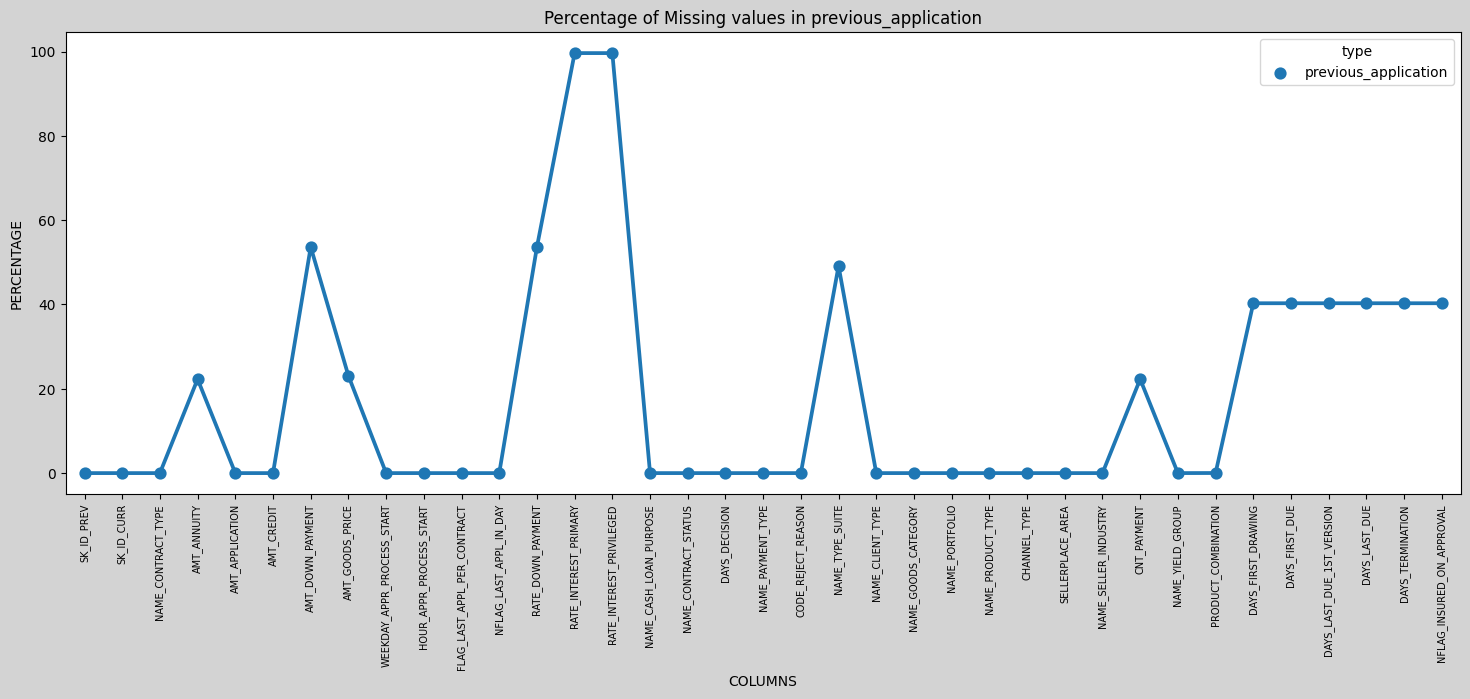

In [9]:
# Create a figure object
fig = plt.figure(figsize=(18, 6))

# Calculate the percentage of missing values in the previous_application dataset
miss_previous_application = pd.DataFrame((previous_application.isnull().sum()) * 100 / previous_application.shape[0]).reset_index()

# Add a column to indicate the type of dataset
miss_previous_application["type"] = "previous_application"

# Create a point plot
ax = sns.pointplot(x="index", y=0, data=miss_previous_application, hue="type")

# Customize the plot
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("w")  # Set background color of the plot
fig.set_facecolor("lightgrey")  # Set background color of the figure

plt.show()

In [10]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

# Merging

In [11]:
# Merge TARGET column from application_df with previous_df:
loans_df = pd.merge(application_data[["SK_ID_CURR", "TARGET"]], previous_application, how = 'right', on = 'SK_ID_CURR')

In [12]:
loans_df.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      271877     0.0     2030495     Consumer loans     1730.430   
1      108129     0.0     2802425         Cash loans    25188.615   
2      122040     0.0     2523466         Cash loans    15060.735   
3      176158     0.0     2819243         Cash loans    47041.335   
4      202054     0.0     1784265         Cash loans    31924.395   

   AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0          17145.0     17145.0               0.0          17145.0   
1         607500.0    679671.0               NaN         607500.0   
2         112500.0    136444.5               NaN         112500.0   
3         450000.0    470790.0               NaN         450000.0   
4         337500.0    404055.0               NaN         337500.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1                0.0   
1                           Y                       1                NaN   
2                           Y                       1                NaN   
3                           Y                       1                NaN   
4                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0               0.182832                  0.867336                    XAP   
1                    NaN                       NaN                    XNA   
2                    NaN                       NaN                    XNA   
3                    NaN                       NaN                    XNA   
4                    NaN                       NaN                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP              NaN         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP              NaN         Repeater                 XNA   
4                 HC              NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide                35   
1           Cash            x-sell           Contact center                -1   
2           Cash            x-sell  Credit and cash offices                -1   
3           Cash            x-sell  Credit and cash offices                -1   
4           Cash           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high    

In [13]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670214 non-null  int64  
 1   TARGET                       1413701 non-null  float64
 2   SK_ID_PREV                   1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE           1670214 non-null  object 
 4   AMT_ANNUITY                  1297979 non-null  float64
 5   AMT_APPLICATION              1670214 non-null  float64
 6   AMT_CREDIT                   1670213 non-null  float64
 7   AMT_DOWN_PAYMENT             774370 non-null   float64
 8   AMT_GOODS_PRICE              1284699 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 10  HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 11  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1670214 non-n

# Exploratory Data Analysis (EDA)

In [14]:
from typing import Tuple

In [15]:
def plot_feature_count(df: pd.DataFrame, feature: str, target: str = "TARGET", figsize: Tuple[int, int] = (8, 6), 
                       rot: int = 0, logy: bool = False, title: str = "", legend_labels: Tuple[str, ...] = ("Repaid", "Default")) -> None:
    """
    Plots the count of each category in a given feature, grouped by the target variable.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    feature : str
        The name of the feature column to be plotted.
    target : str, optional
        The name of the target variable column, by default "TARGET".
    figsize : tuple[int, int], optional
        The size of the figure (width, height), by default (8, 6).
    rot : int, optional
        The rotation angle of x-axis tick labels, by default 0.
    logy : bool, optional
        Whether to use logarithmic scale for the y-axis, by default False.
    title : str, optional
        The title of the plot, by default "".
    legend_labels : tuple[str, ...], optional
        The labels for the legend, by default ("Repaid", "Default").

    Returns
    -------
    None
        Displays the plot.
    """
    plt.figure(figsize = figsize)

    ax = sns.countplot(data = df, 
                       x = feature,
                       hue = target, 
                       order = df[feature].value_counts().index)

    for i in ax.containers:
        ax.bar_label(i)
        
    if logy:
        plt.yscale('log')
        
    if rot:
        plt.xticks(rotation = rot)
    
    if legend_labels:
        plt.legend(legend_labels)
        
    plt.title(title)
    plt.show()
    
def plot_numerical_feature(df: pd.DataFrame, feature: str, figsize: Tuple[int, int] = (20, 8)) -> None:
    """
    Plots the distribution of a numerical feature in the data and its distribution for repaying and defaulting applicants.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    feature : str
        The name of the numerical feature column to be plotted.
    figsize : Tuple[int, int], optional
        The size of the figure (width, height), by default (20, 8).

    Returns
    -------
    None
        Displays the plot.
    """
    fig, ax = plt.subplots(1, 2, figsize = figsize)
    
    ax[0].set_title(f"{feature} distribution in the data")
    sns.histplot(data = df, 
                 x = feature, 
                 kde = True, 
                 stat = "probability",
                 ax = ax[0])
    
    ax[1].set_title(f"{feature} distribution for repaying and defaulting applicants")
    sns.violinplot(data = df, 
                   x = feature, 
                   y = "TARGET", 
                   orient = "h",
                   ax = ax[1])
    ax[1].set_yticks((0, 1), ("Repaid", "Default"))
    
    plt.show()
    
def get_null_percentage(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the percentage of missing values in each column of a DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame.

    Returns:
    --------
    pd.Series
        A Series containing the percentage of missing values for each column.
    """
    return df.isnull().sum() / len(df) * 100.00

# Null values

In [17]:
applications_null_ratio = get_null_percentage(application_data)
print("Number of columns with missing values in applications_df =", len(applications_null_ratio[applications_null_ratio > 0]))

Number of columns with missing values in applications_df = 67


In [18]:
applications_null_ratio[applications_null_ratio > 0]

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

### Out of 122 columns in the Applicants dataframe, 67 have missing values.
### 49 columns have at least 47% null values, most of them are related to the applicant's house/apartment.

In [20]:
previous_null_ratio = previous_application.isnull().sum() / len(previous_application) * 100.00
print("Number of columns with missing values in previous_df =", len(previous_null_ratio[previous_null_ratio > 0]))

Number of columns with missing values in previous_df = 16


In [21]:
previous_null_ratio

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

###  Out of 37 columns in the previous applications dataframe, 16 have missing values.
### 11 columns have at least 40% null values, most of them are related to the applicant's house/apartment.
### Columns related to the interest rate (RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED) are mostly missing.

# Bivariate Analysis

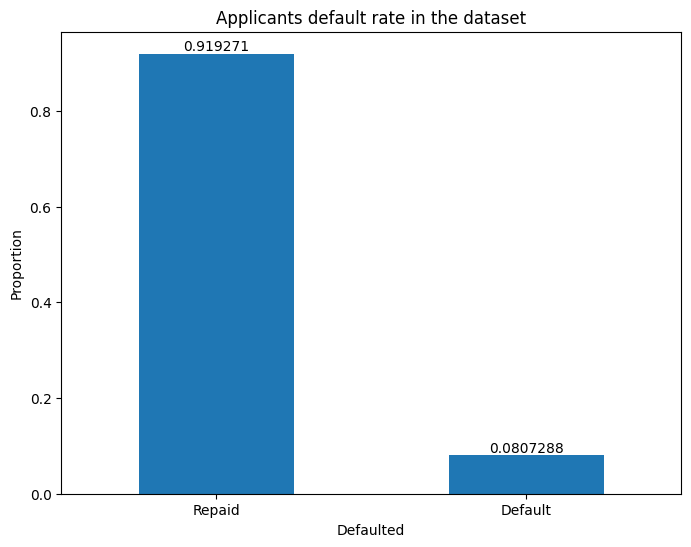

In [22]:
ax = application_data["TARGET"].value_counts(normalize = True)\
                             .plot(kind = "bar", 
                                   figsize = (8, 6),
                                   title = "Applicants default rate in the dataset",
                                   xlabel = "Defaulted",
                                   ylabel = "Proportion",
                                   rot = 0)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks([0, 1], ["Repaid", "Default"])
plt.show()

### The dataset is heavily imbalanced: Only 8% of applicants default their loans. 

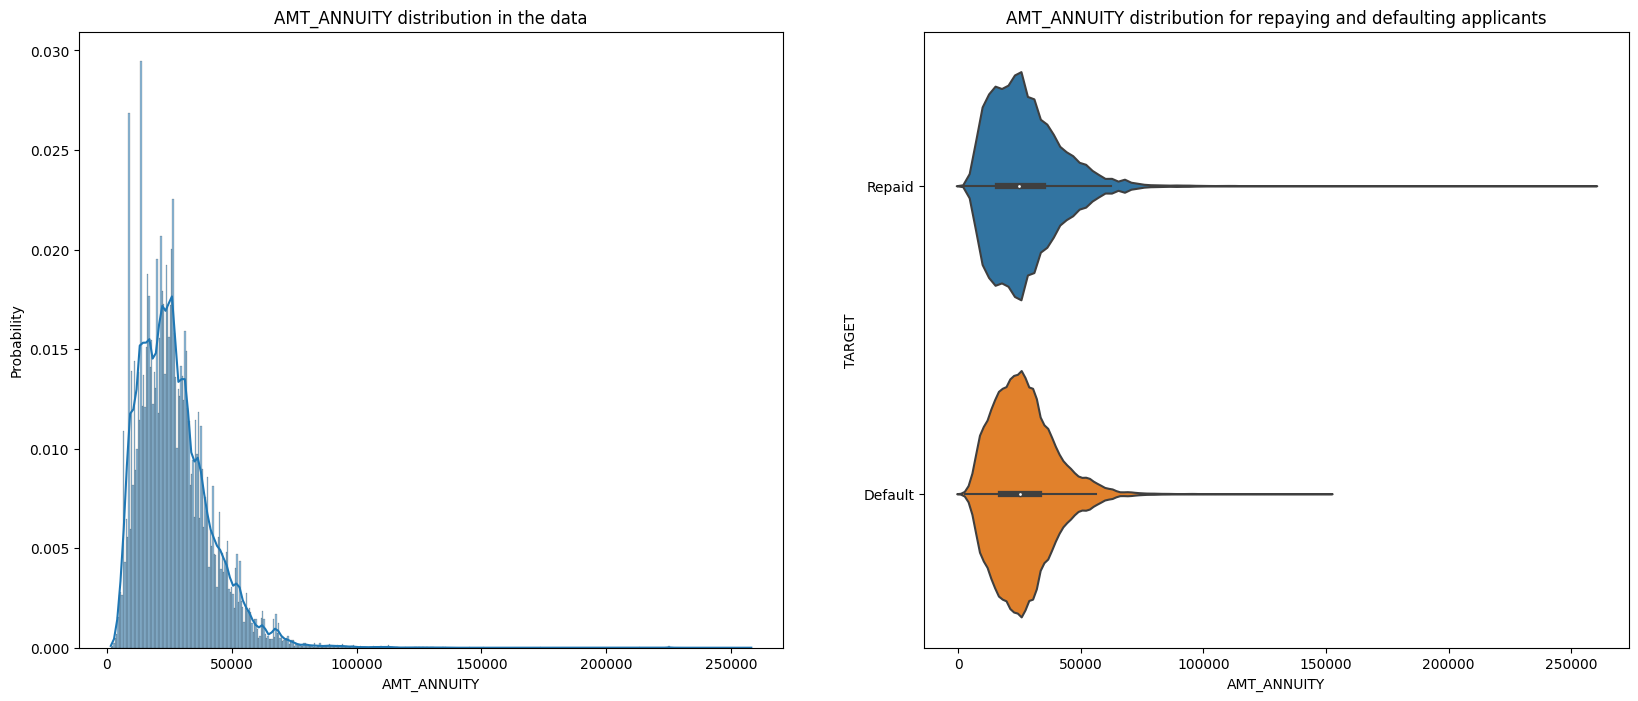

In [23]:
plot_numerical_feature(application_data, "AMT_ANNUITY")

### The loan annuity distibution is right skewed and contains many outliers as well.
### Most applicant pay less than 50k for the credit loan.

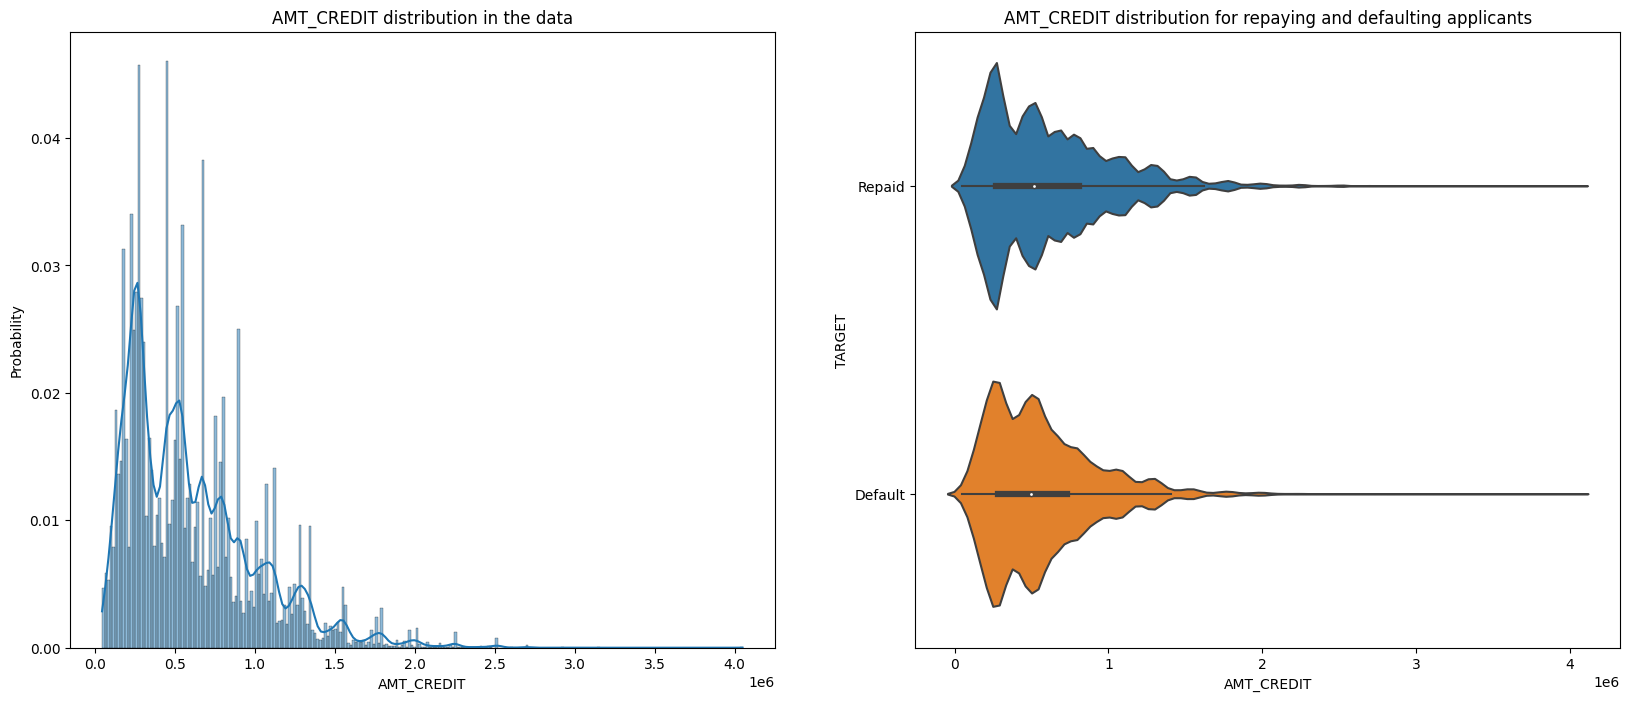

In [24]:
plot_numerical_feature(application_data, "AMT_CREDIT")

### The loans credit distribution is skewed and shows multiple peaks and many outliers.
### The credit distribution isn't very different for both repaying and defualting applicants. 

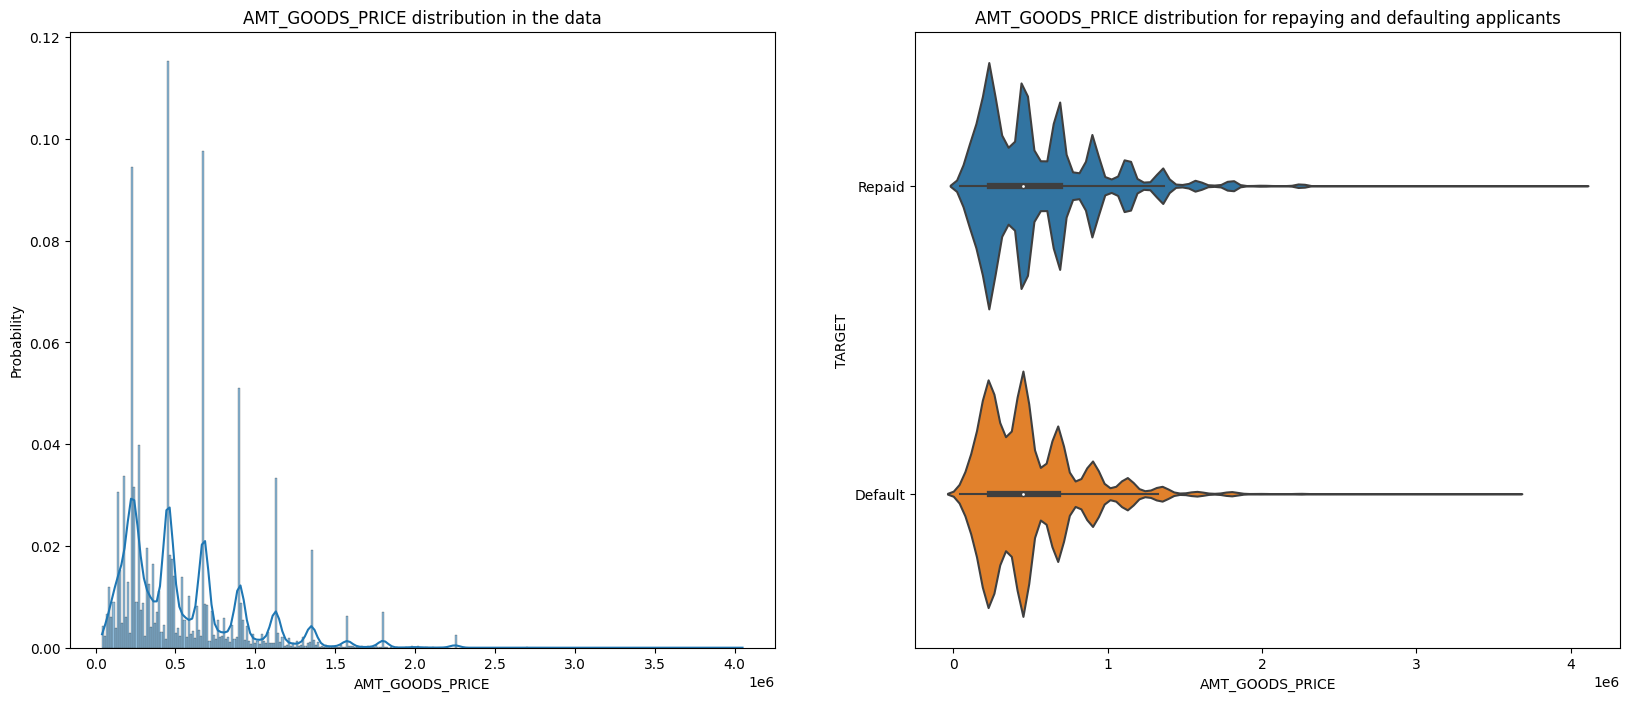

In [25]:
plot_numerical_feature(application_data, "AMT_GOODS_PRICE")

### The price of goods distribution is similar to the credit distribution, which is expected; applicants will apply for a loan that more-or-less matches the price of goods they want to buy. 

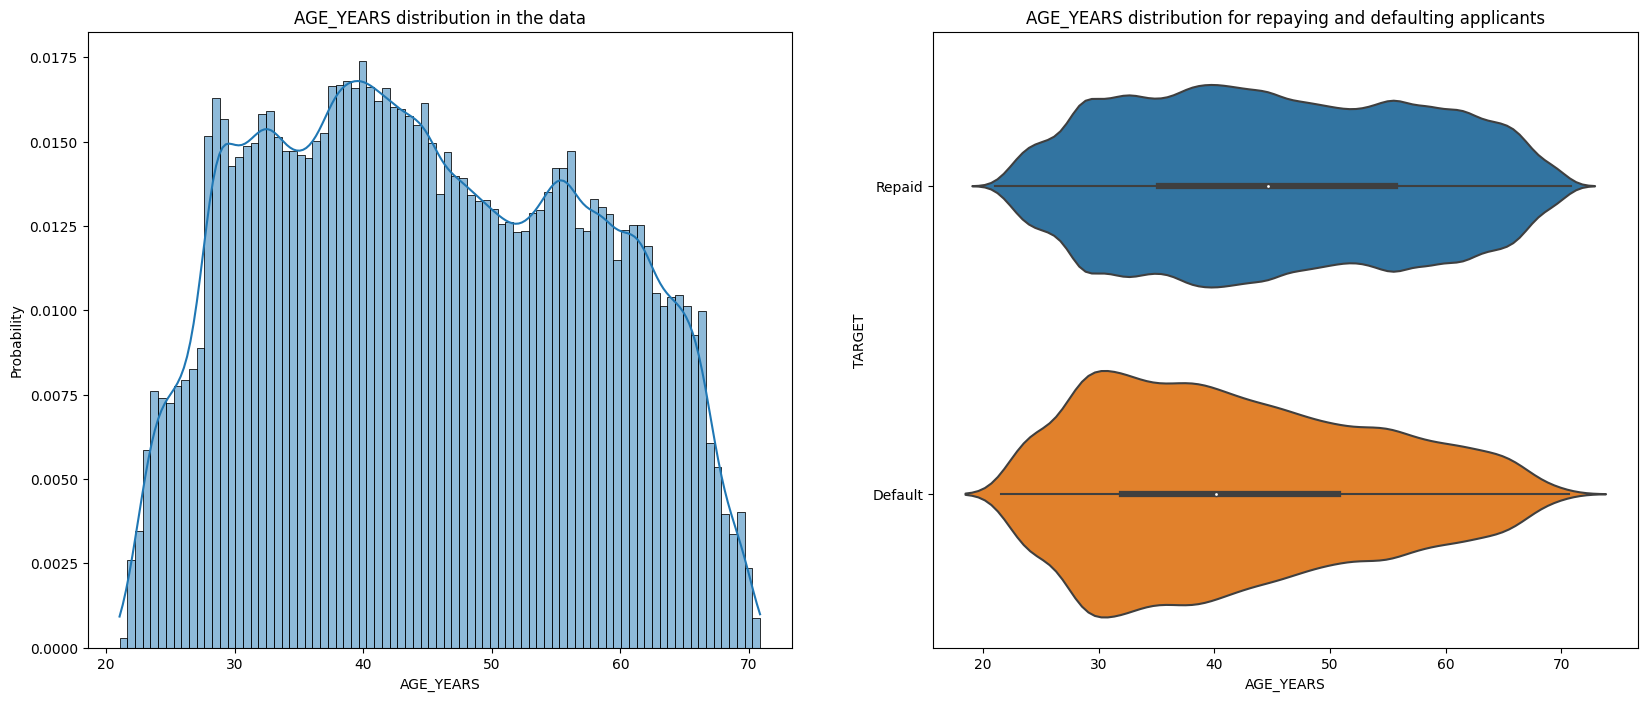

In [26]:
application_data["AGE_YEARS"] = abs(application_data["DAYS_BIRTH"]) / 356
plot_numerical_feature(application_data, "AGE_YEARS")

### Applicants' age is distributed between 20 and 70.
### The available data suggests that older applicants (<50) are less likely to default than younger applicant. 

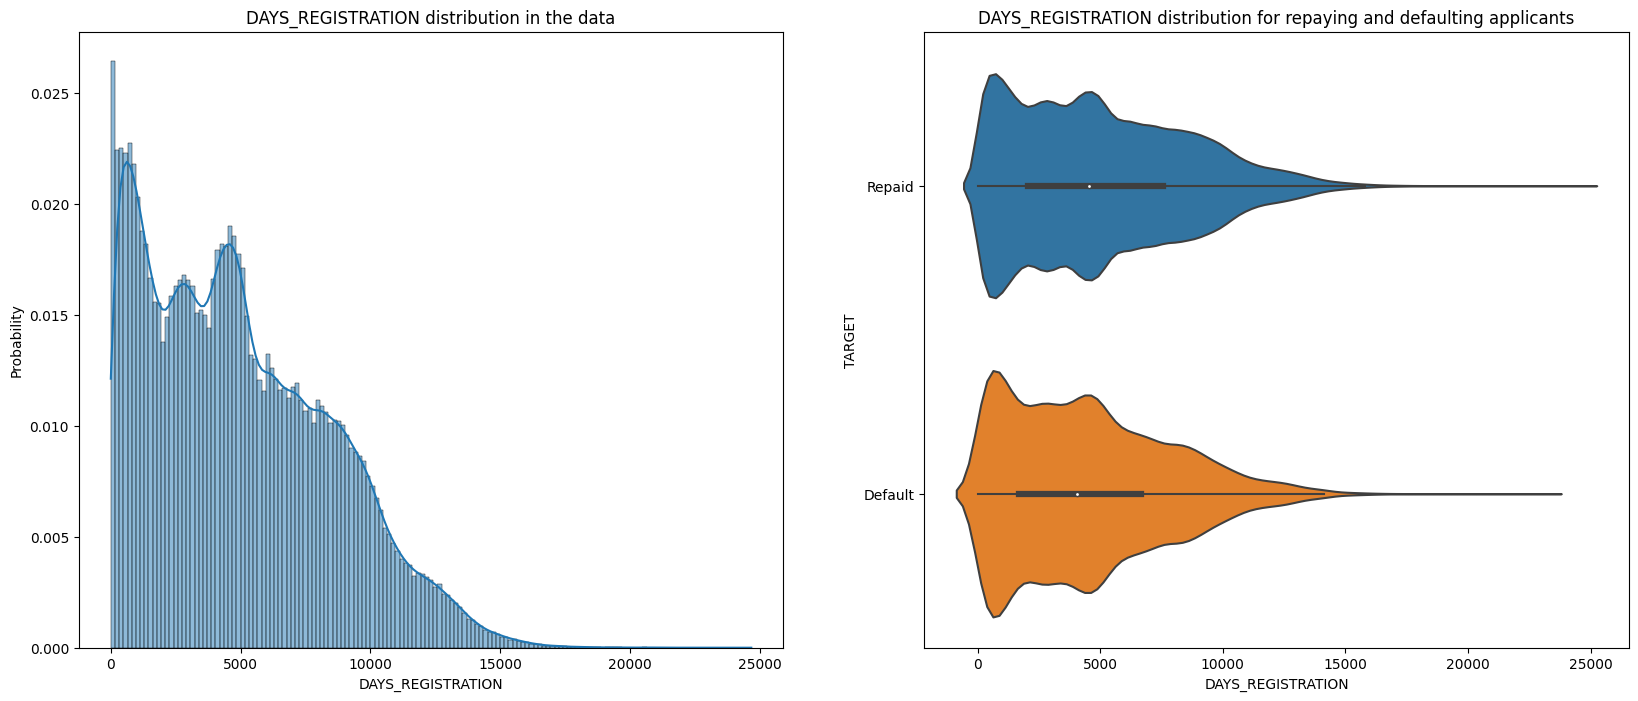

In [27]:
application_data["DAYS_REGISTRATION"] = - application_data["DAYS_REGISTRATION"]
plot_numerical_feature(application_data, "DAYS_REGISTRATION")

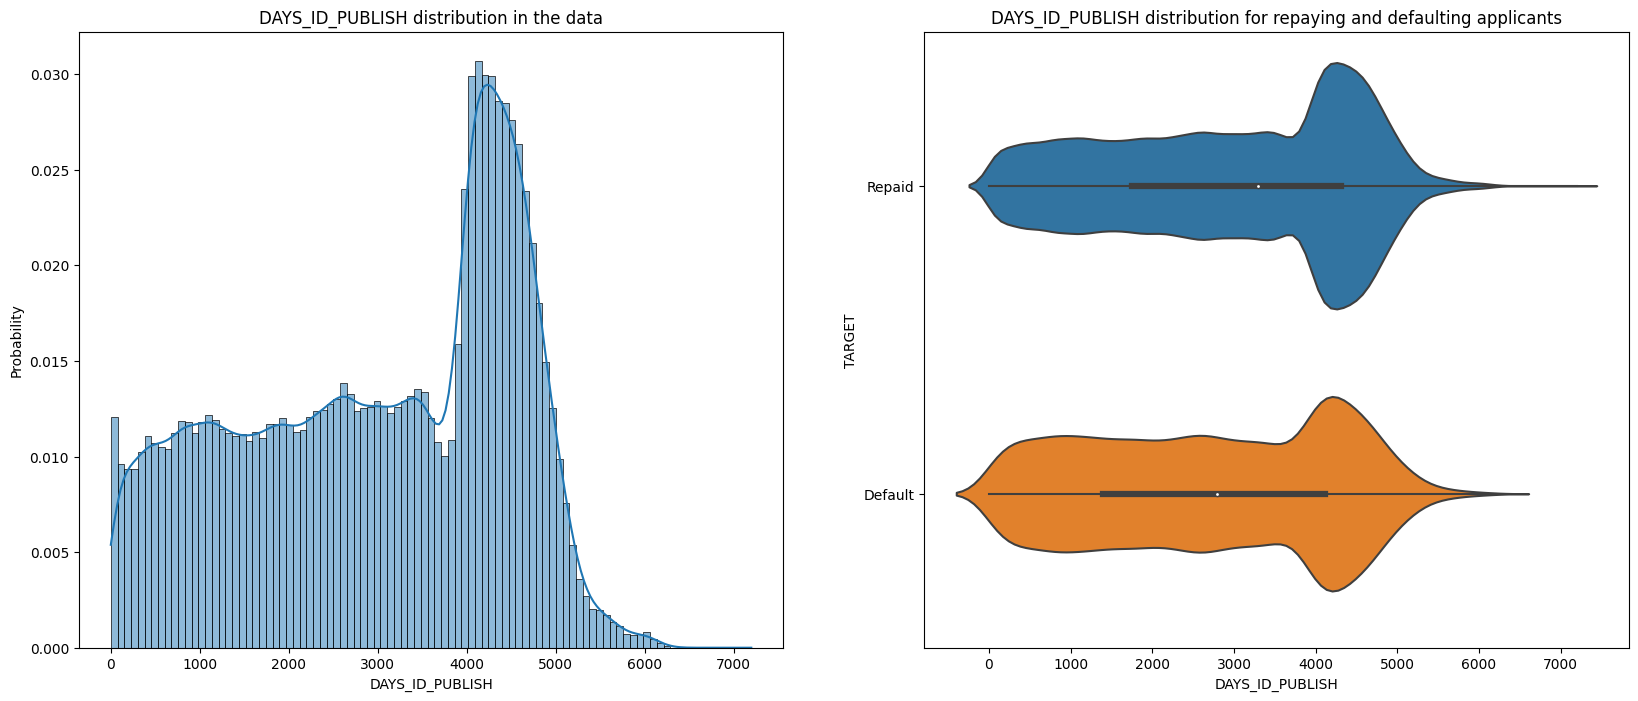

In [28]:
application_data["DAYS_ID_PUBLISH"] = abs(application_data["DAYS_ID_PUBLISH"])
plot_numerical_feature(application_data, "DAYS_ID_PUBLISH")


### 30% of applicants have not changed their ID document with which they applied for the loan in 10 years.


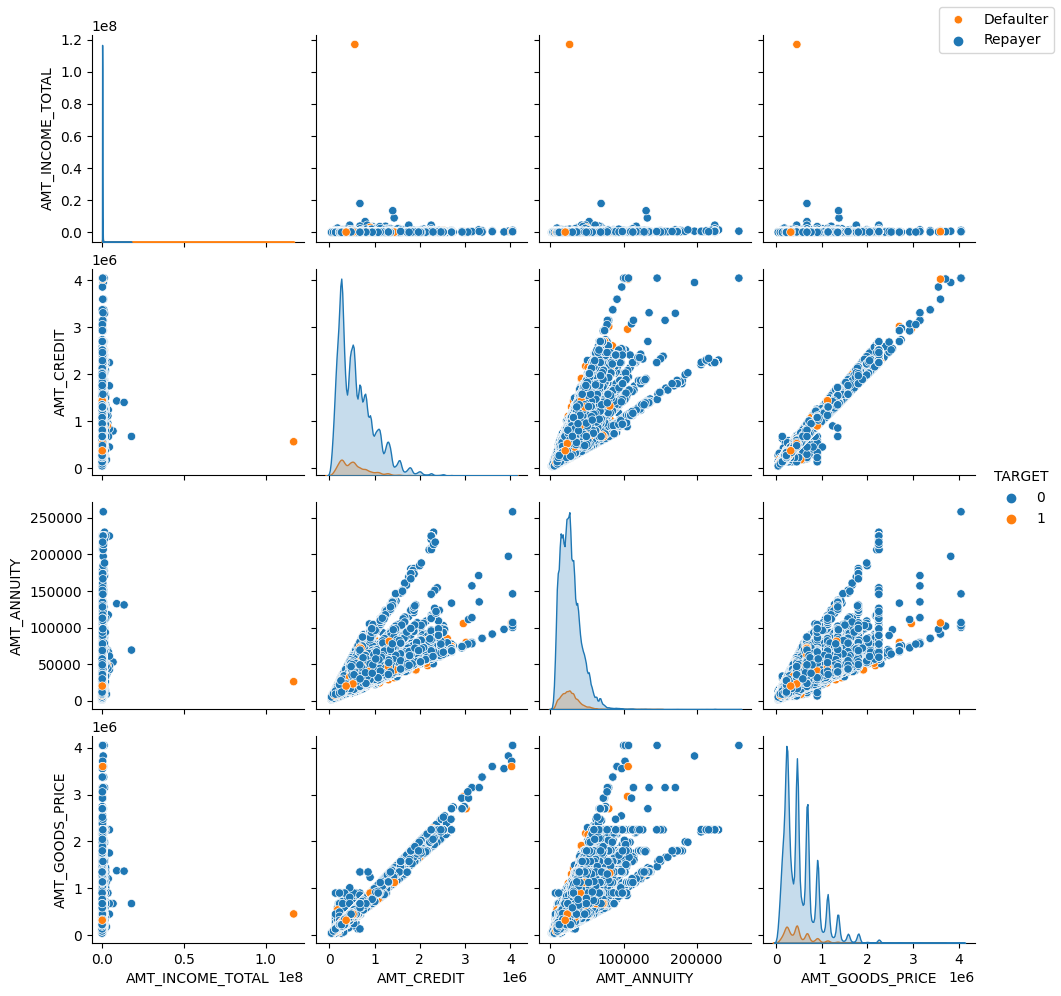

In [29]:
amount_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']
amount = application_data[amount_cols]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax = sns.pairplot(amount,
                  hue = "TARGET")

ax.fig.legend(labels = ('Defaulter', 'Repayer'))
plt.show()

### We can see that AMT_CREDIT and AMT_GOODS_PRICE are positively linearly correlated, which validates our previous insight.
### This correlation should be treated in the preprocessing by keeping one feature and dropping the other. 

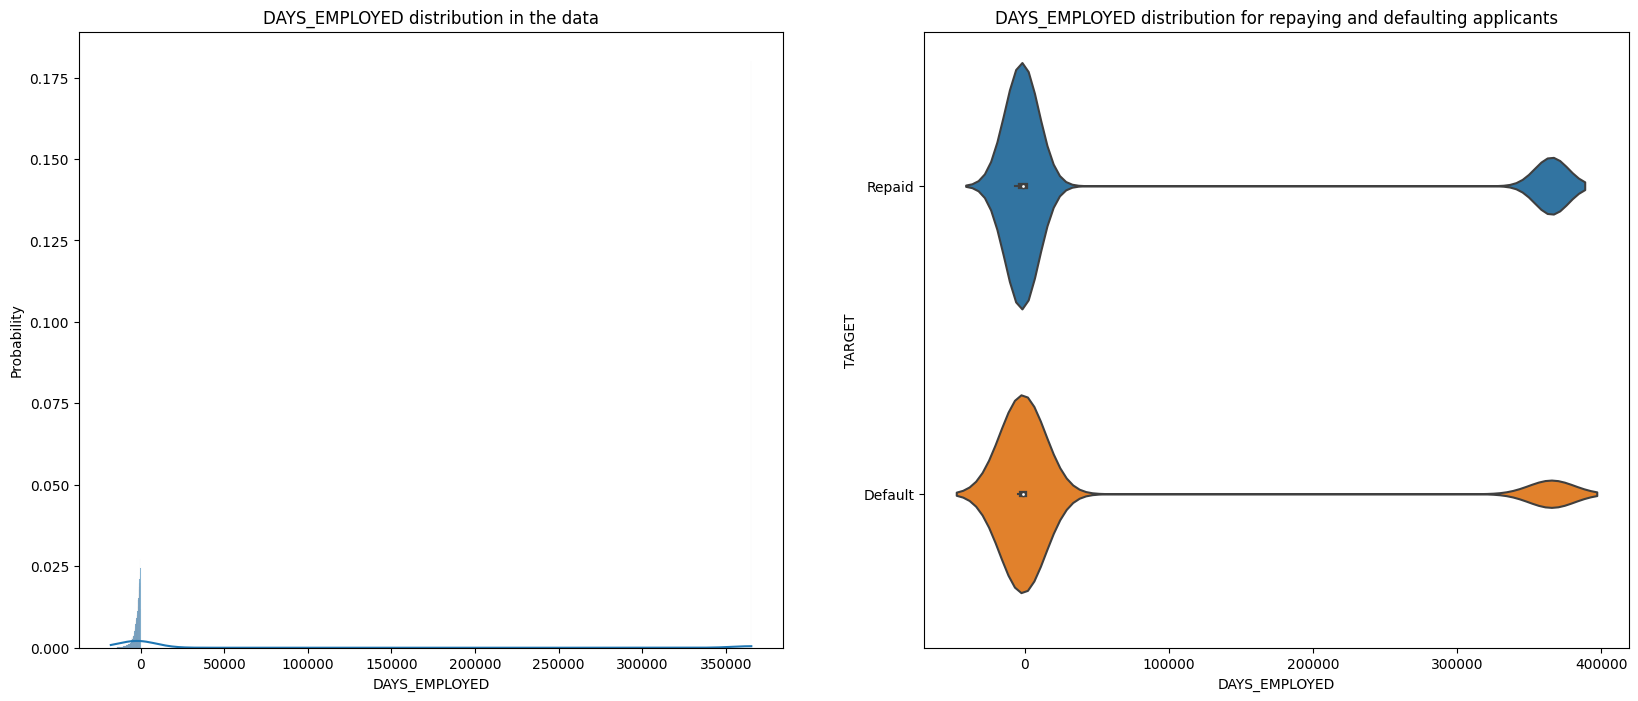

In [30]:
plot_numerical_feature(application_data, "DAYS_EMPLOYED")

In [31]:
days_employed_error_values = application_data[application_data["DAYS_EMPLOYED"] > 0]
print(f"Percentage of error values in 'DAYS_EMPLOYED' = {len(days_employed_error_values) / len(application_data):.2%}")
days_employed_error_values["DAYS_EMPLOYED"].sample(5)

Percentage of error values in 'DAYS_EMPLOYED' = 18.01%


31201     365243
297101    365243
298745    365243
258092    365243
111441    365243
Name: DAYS_EMPLOYED, dtype: int64

### Some values in DAYS_EMPLOYED are clearly not correct.
### 18% of applications are reporting 365,243 days of employment, even though this is impossible. Moreover, all other values are listed with a negative sign.
### We should treat these values as missing, as they are not valid outliers. 

In [32]:
application_data.loc[application_data["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = np.nan
len(application_data[application_data["DAYS_EMPLOYED"] > 0])

0

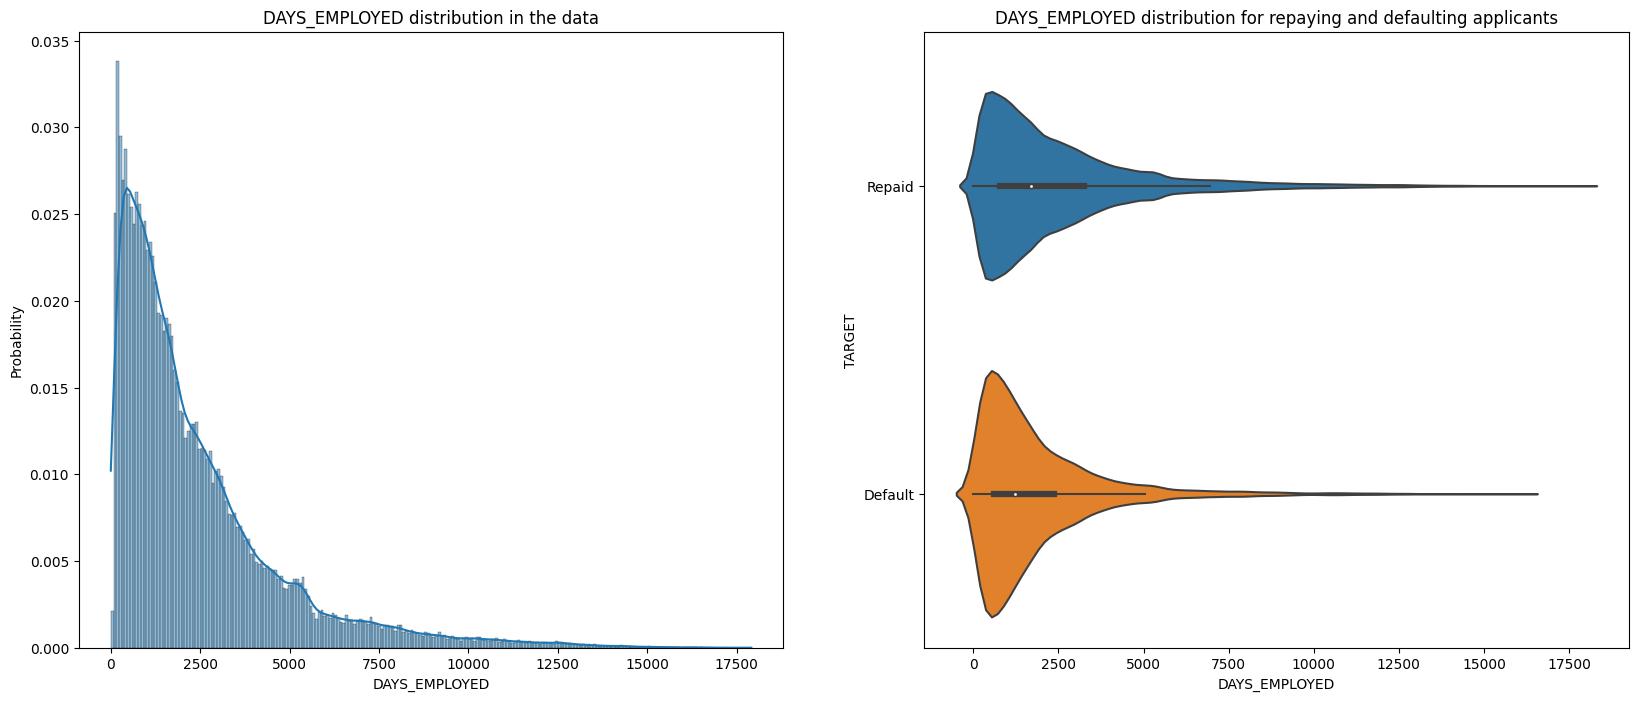

In [33]:
application_data["DAYS_EMPLOYED"] = abs(application_data["DAYS_EMPLOYED"])
plot_numerical_feature(application_data, "DAYS_EMPLOYED")

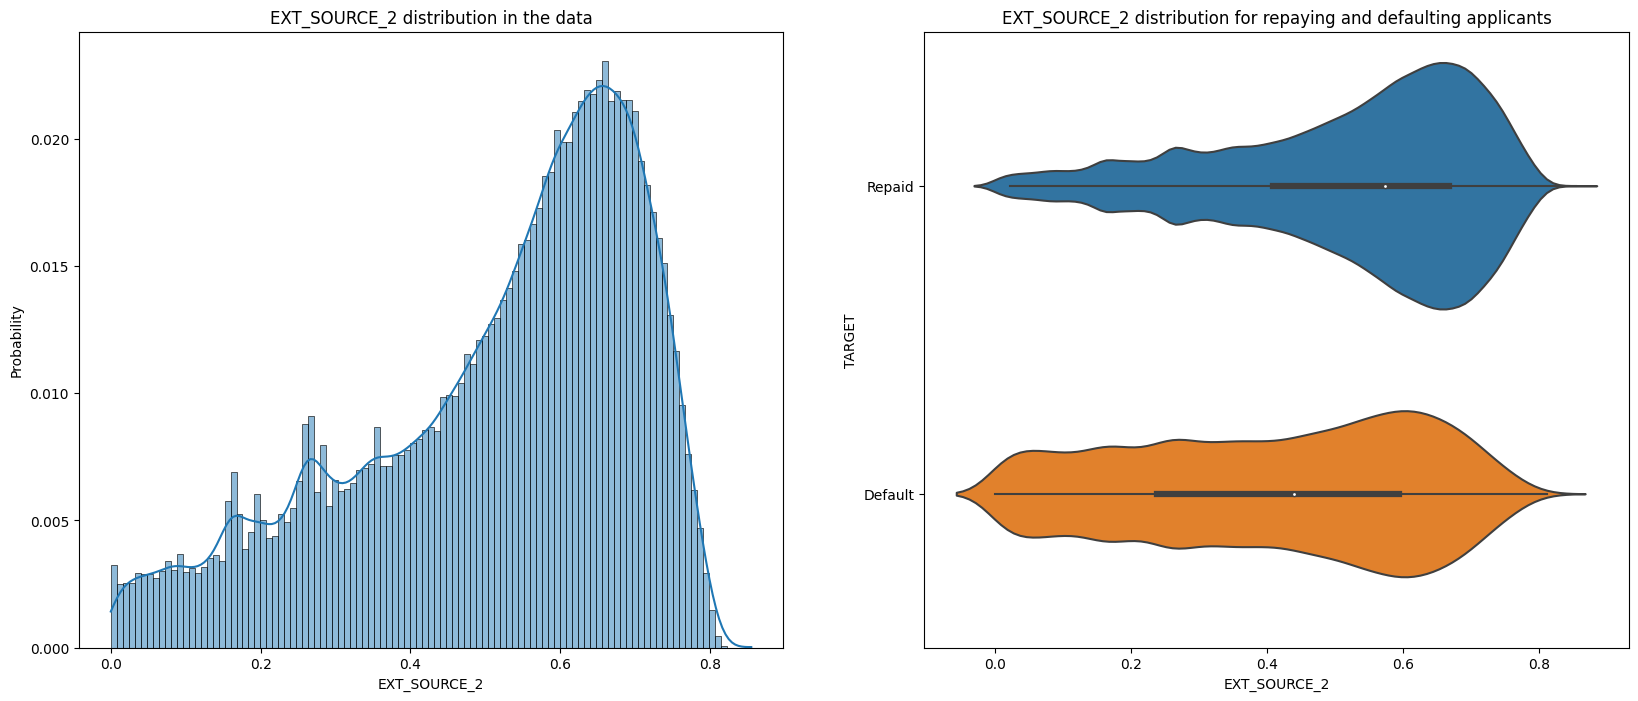

In [34]:
plot_numerical_feature(application_data, "EXT_SOURCE_2")

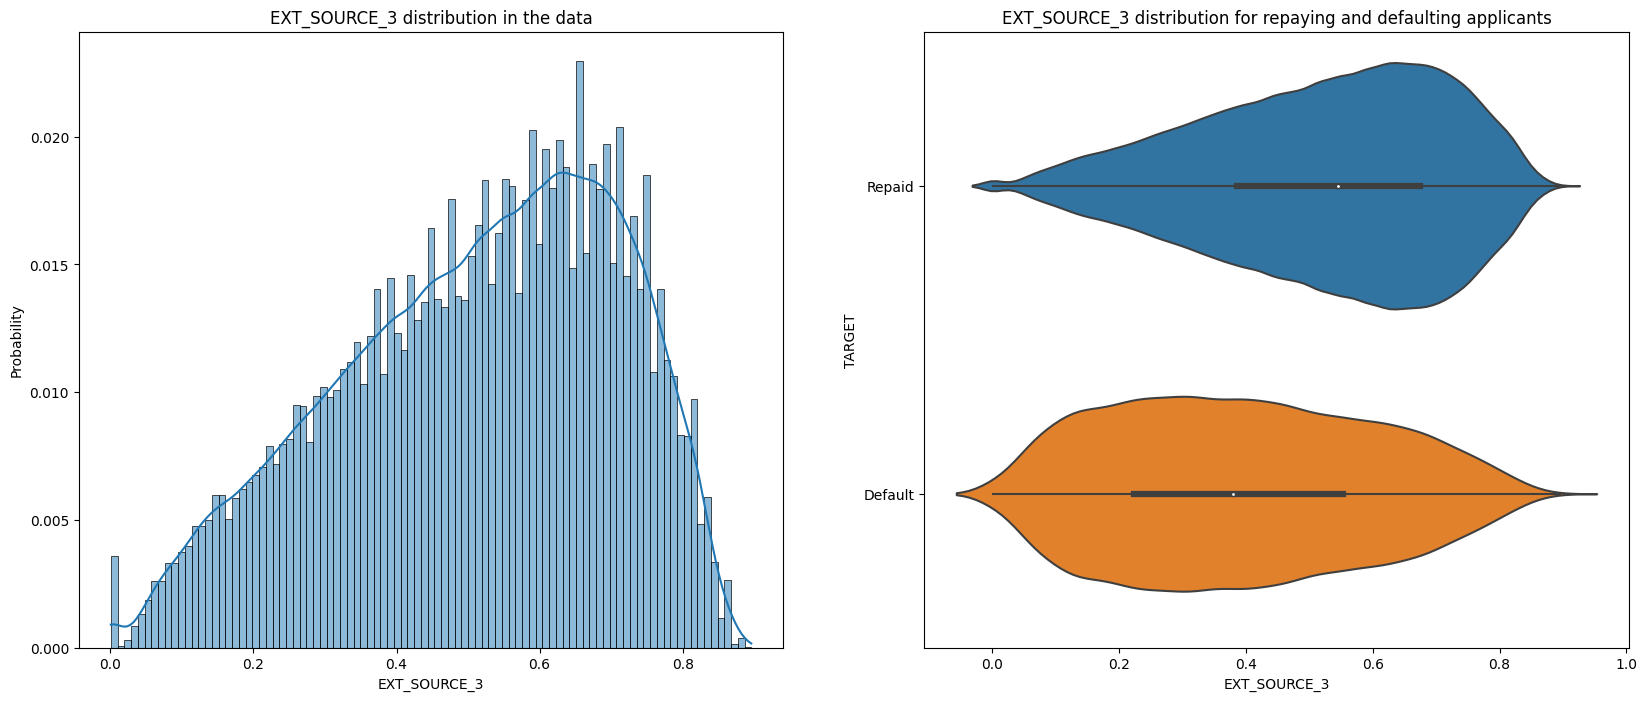

In [35]:
plot_numerical_feature(application_data, "EXT_SOURCE_3")

### Applicants that have EXT_SOURCE_2 score < 0.4 are more likely to default than others.
### Applicants that have EXT_SOURCE_3 score > 0.5 are less likely to default than others.
### EXT_SOURCE_2 and EXT_SOURCE_3 are the only features that show a stiking difference in distribution between repaying and defaulting applicants. So they must be important. 

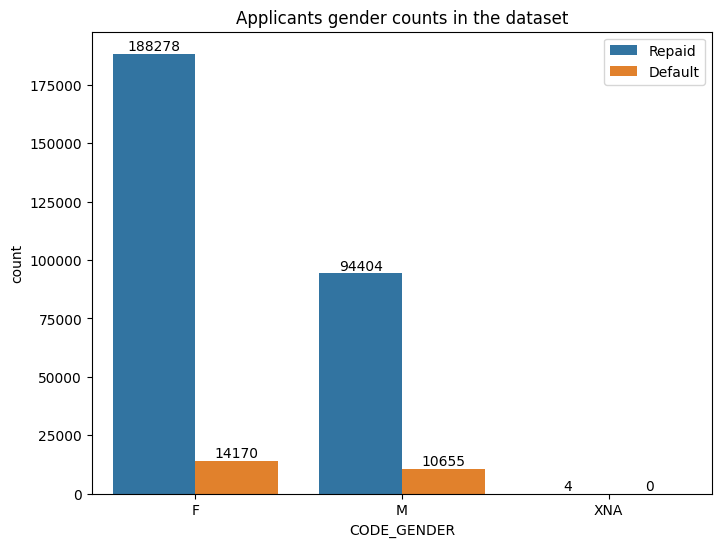

In [36]:
plot_feature_count(application_data, "CODE_GENDER", title = "Applicants gender counts in the dataset")

### Around 66% of applicants in the dataset are females.
### The available data shows that female applicants are more likely to repay their loans than male applicants (~7% vs. ~10% default rate). 

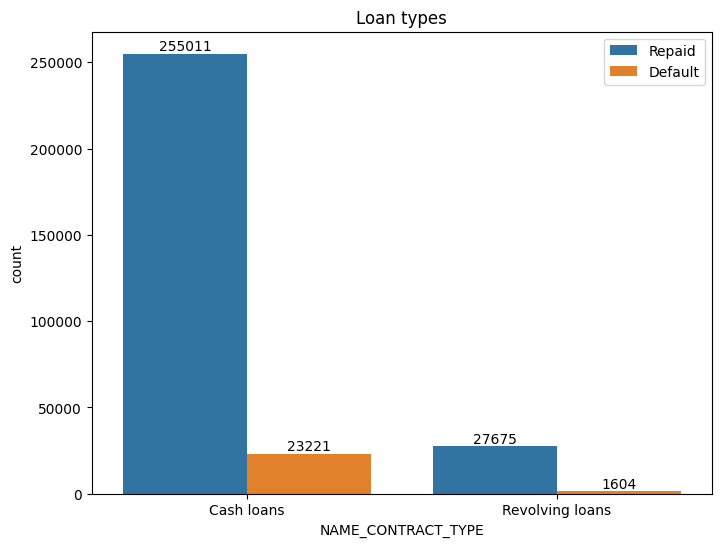

In [37]:
plot_feature_count(application_data, "NAME_CONTRACT_TYPE", title = "Loan types")

### Most loans (90%) in the dataset are cash loans.
### The available data shows that cash loans are less likely to be repaid than revolving loans (~8.2% vs. ~5.5% default rate). 

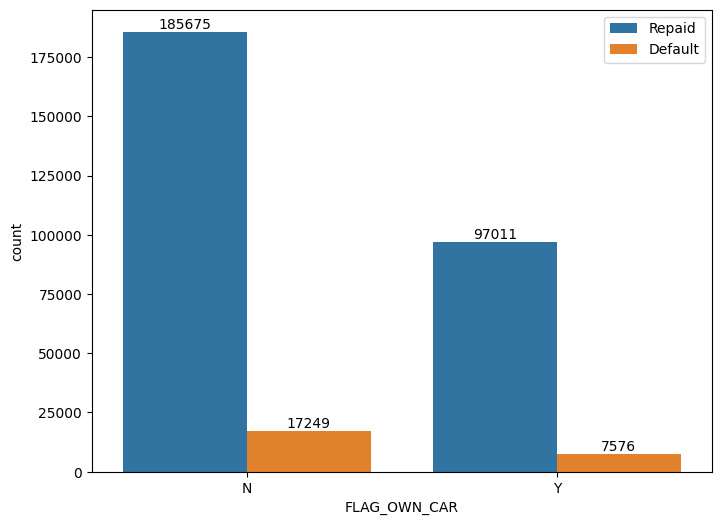

In [38]:
plot_feature_count(application_data, "FLAG_OWN_CAR")

### 35% of applicants in the dataset own a car.
### The available data shows that there is barely any correlation between owning a car and loan repayment as both cases have almost the same ratio of repayment (~7.2% vs. ~8.2 default rate). 

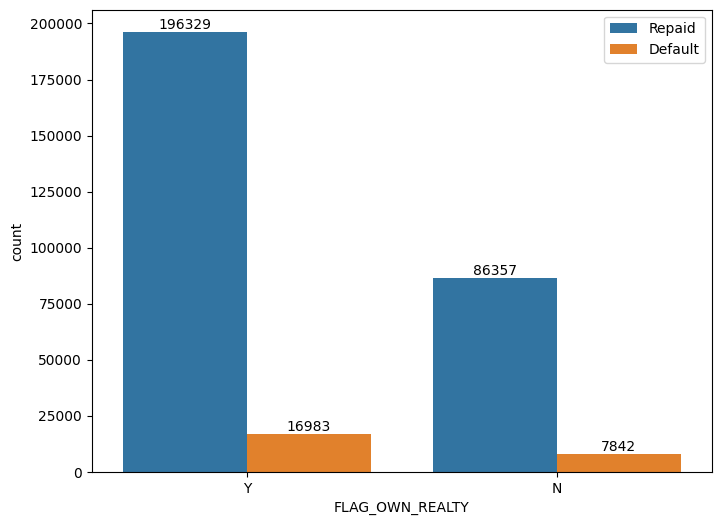

In [39]:
plot_feature_count(application_data, "FLAG_OWN_REALTY")

### Around 70% of applicants in the dataset own real estate.
### Just like FLAG_OWN_CAR, the data shows that both categories have the same percentage of loan repayment (~8% default rate). 

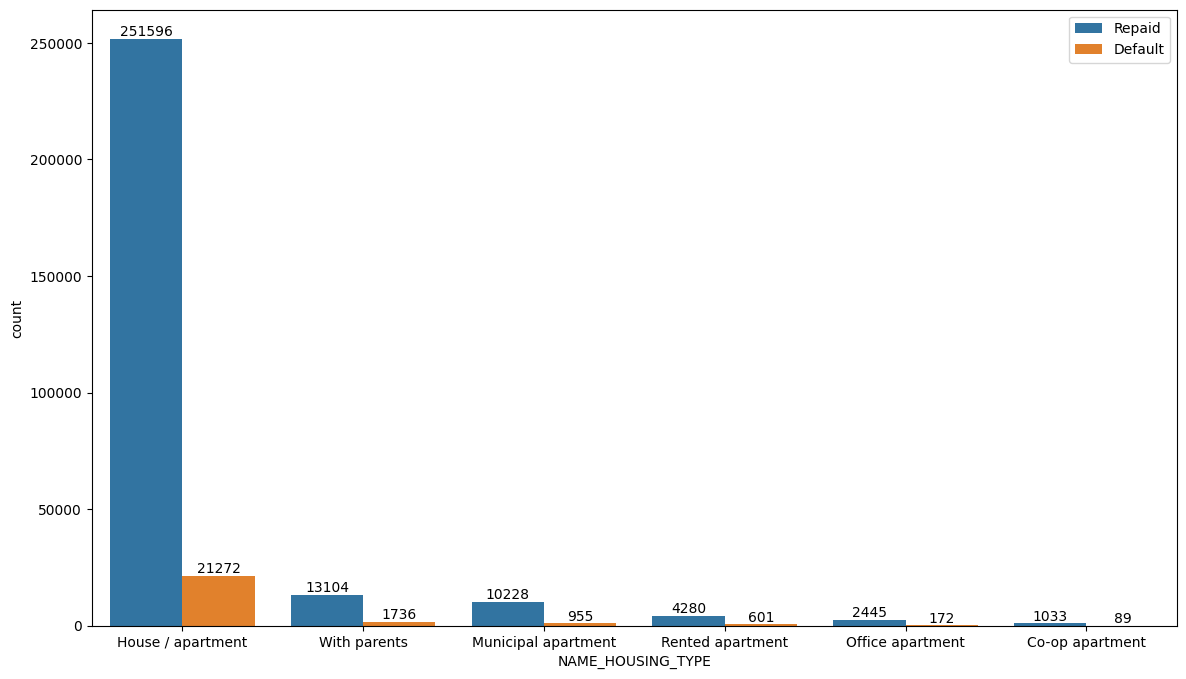

In [40]:
plot_feature_count(application_data, "NAME_HOUSING_TYPE", figsize = (14, 8))

### Around 90% of applicant in the dataset have their own house/apartment.
### The data shows that applicant who have rented apartments or living with parents are less likely to repay their loans than other applicants (~13% default rate).
### While applicants with office apartments are more likely to repay than the others (~6.5% default rate). 

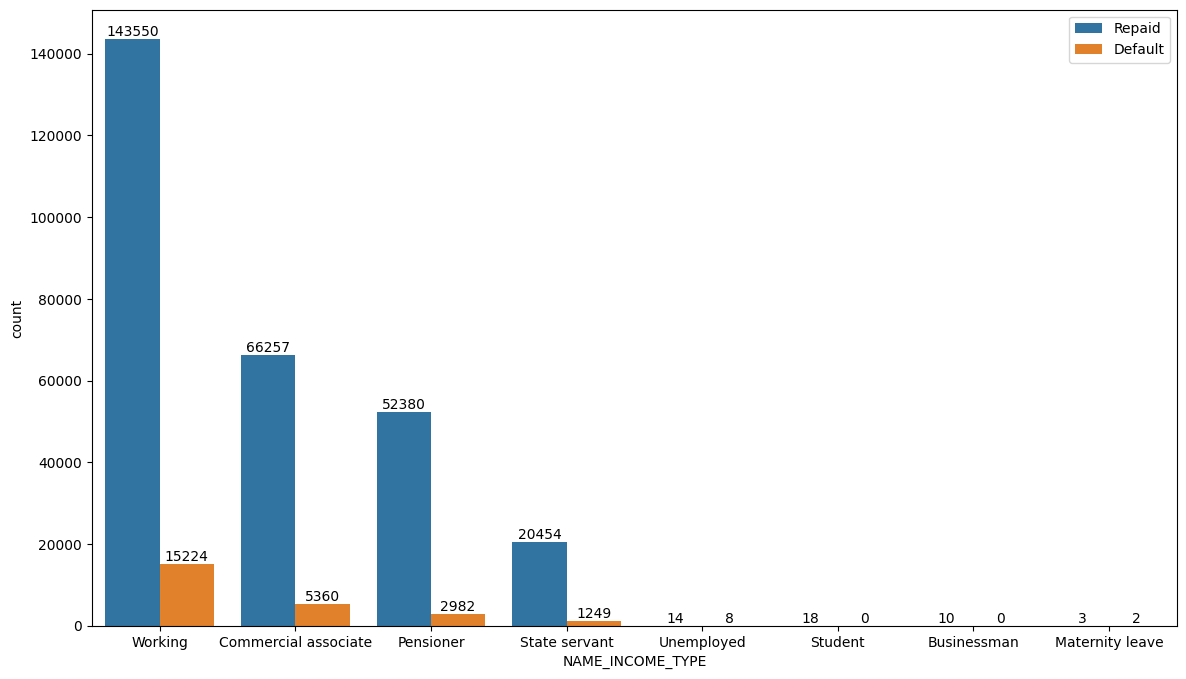

In [41]:
plot_feature_count(application_data, "NAME_INCOME_TYPE", figsize = (14, 8))

### Around 50% of applicants in the dataset have an income type Working.
### Excluding the types that have very low count, Pensioner applicant are the most likely to repay their loan (~6% default rate)
### While Working applicants are the least likely (~10% default rate). 

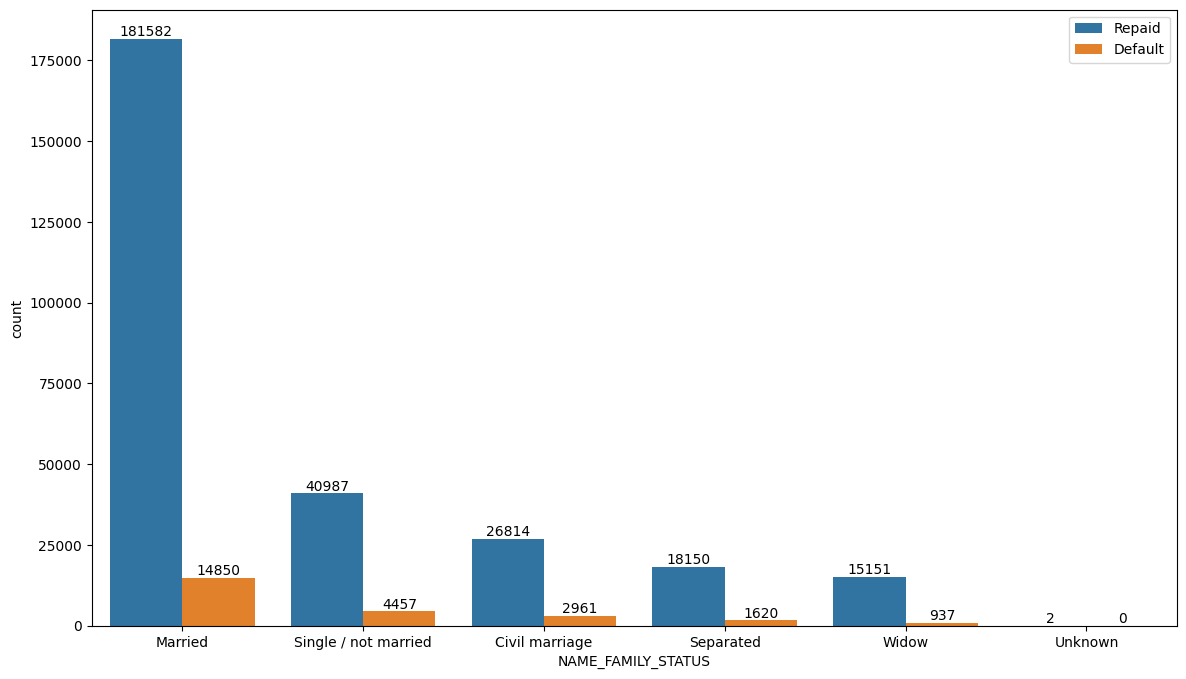

In [42]:
plot_feature_count(application_data, "NAME_FAMILY_STATUS", figsize = (14, 8))

### Around 64% of applicants in the dataset are married.
### Widowed applicant are the most likely to repay their loan (~6% default rate)
### While applicants in a civil marriage are the least likely (~10% default rate). 

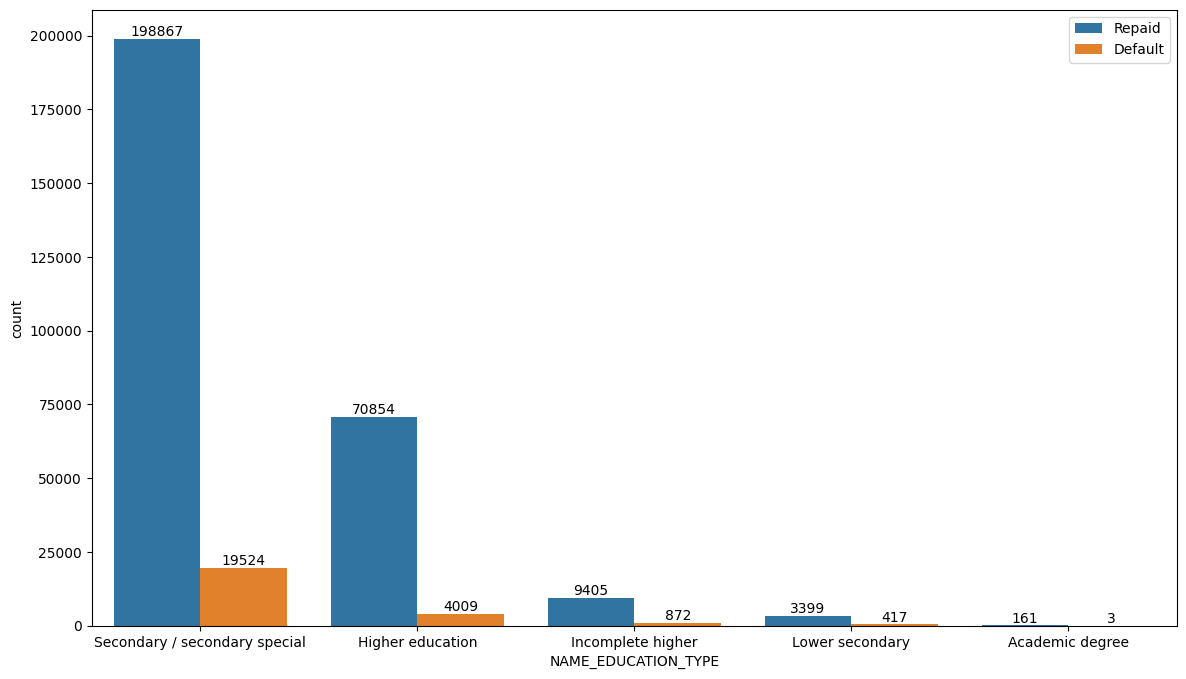

In [43]:
plot_feature_count(application_data, "NAME_EDUCATION_TYPE", figsize = (14, 8))

### Around 70% of applicants in the data have Secondary / secondary special education.
### Applicants with Lower secondary education are the least likely to repay their loans (~11% default rate). 
### While applicants with Academic degree are the most likely (~2% default rate). 

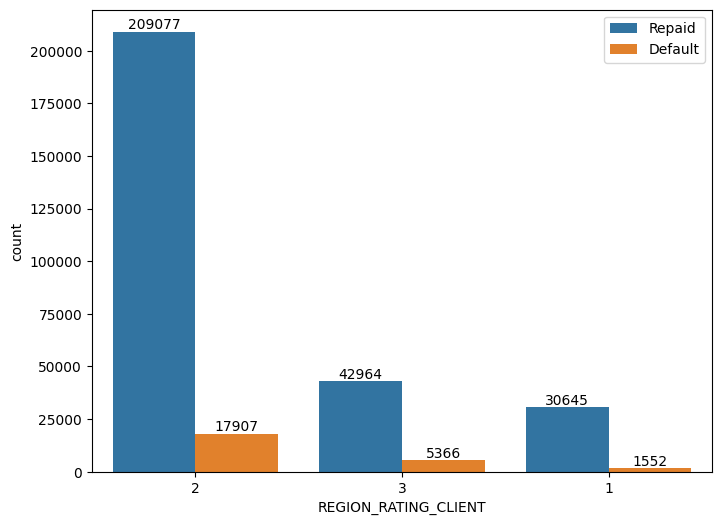

In [44]:
plot_feature_count(application_data, "REGION_RATING_CLIENT")

### Around 74% of applicant live in a region with rating 2.
### Applicants from region 3 rating are the least likely to repay their loans (~11% default rate).
### While applicants from region 1 rating are the least likely (~4.3% default rate). 

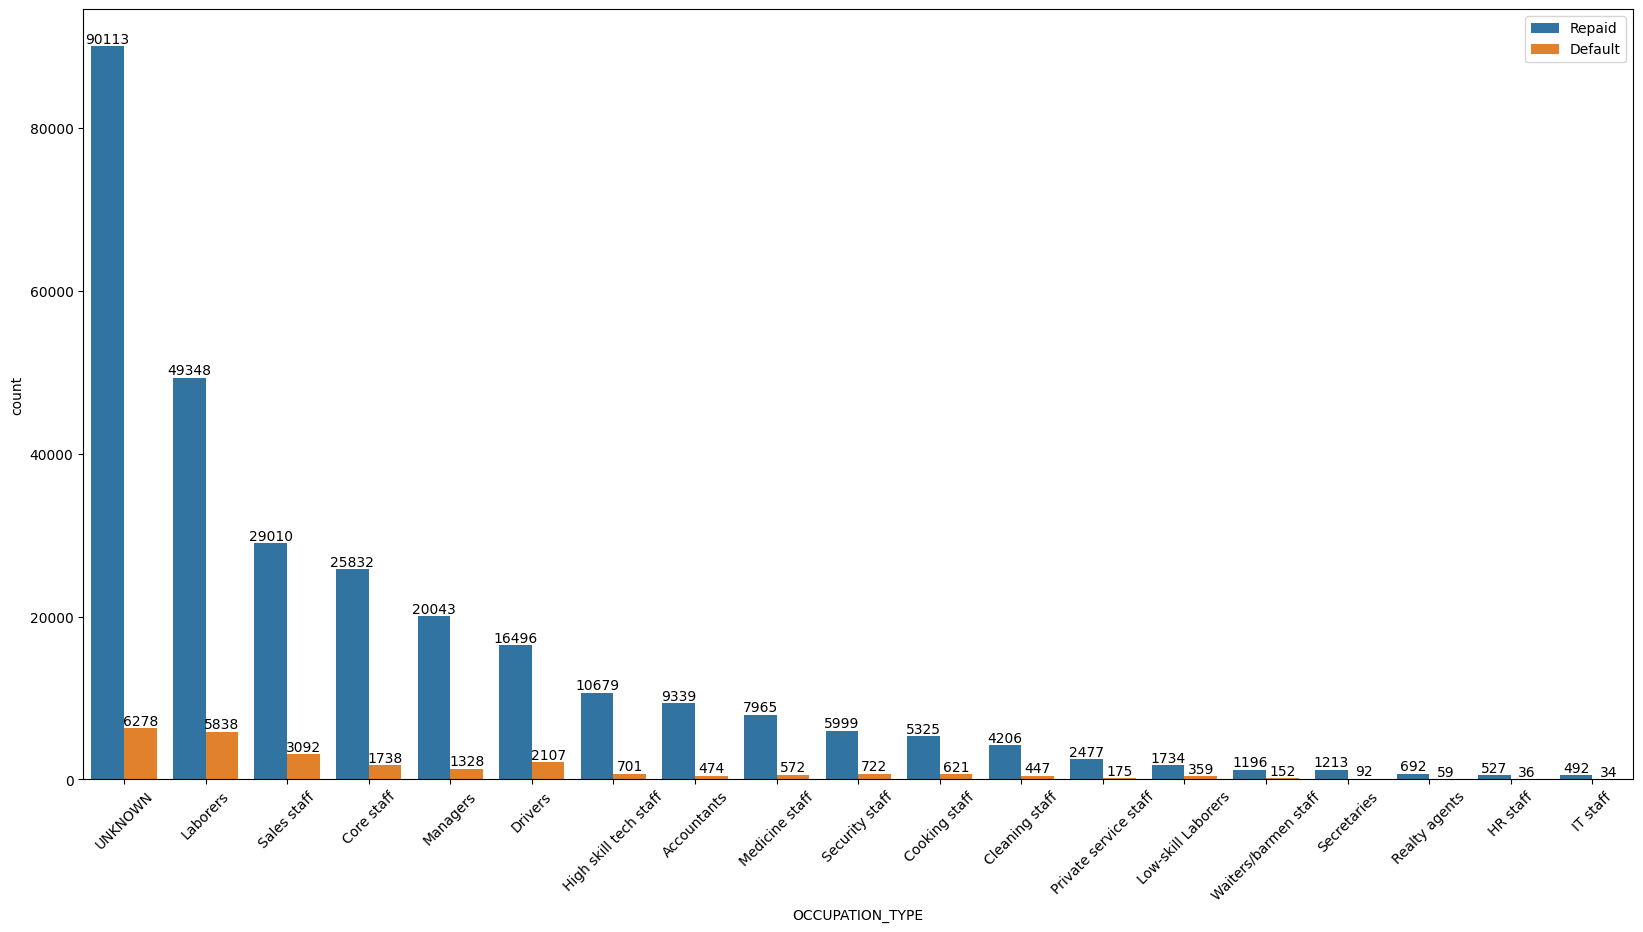

In [45]:
occupation_type_df = application_data[['OCCUPATION_TYPE', "TARGET"]]
occupation_type_df['OCCUPATION_TYPE'].fillna("UNKNOWN", inplace = True)

plot_feature_count(occupation_type_df, "OCCUPATION_TYPE", figsize = (20, 10), rot = 45)

### Around 31% of applicants in the data didn't provide their occupation type.
### Low-skill Laborers are the least likely to repay their loans (~17% default rate)
### While Accountants are the most likely (~5% default rate). 

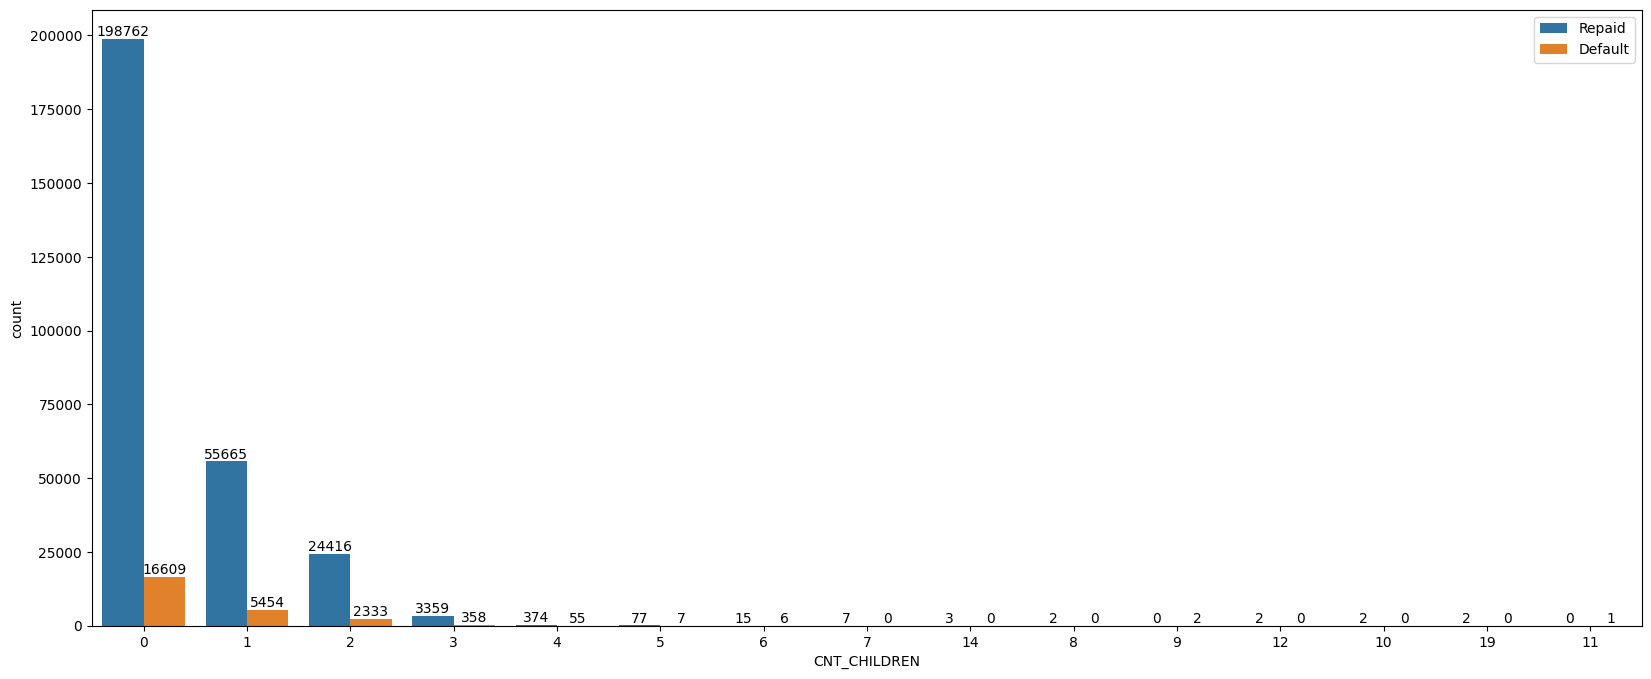

In [46]:
plot_feature_count(application_data, "CNT_CHILDREN", figsize = (20, 8))

### 70% of applicants in the dataset don't have children.
### Very few applicants have more than 3 children. 

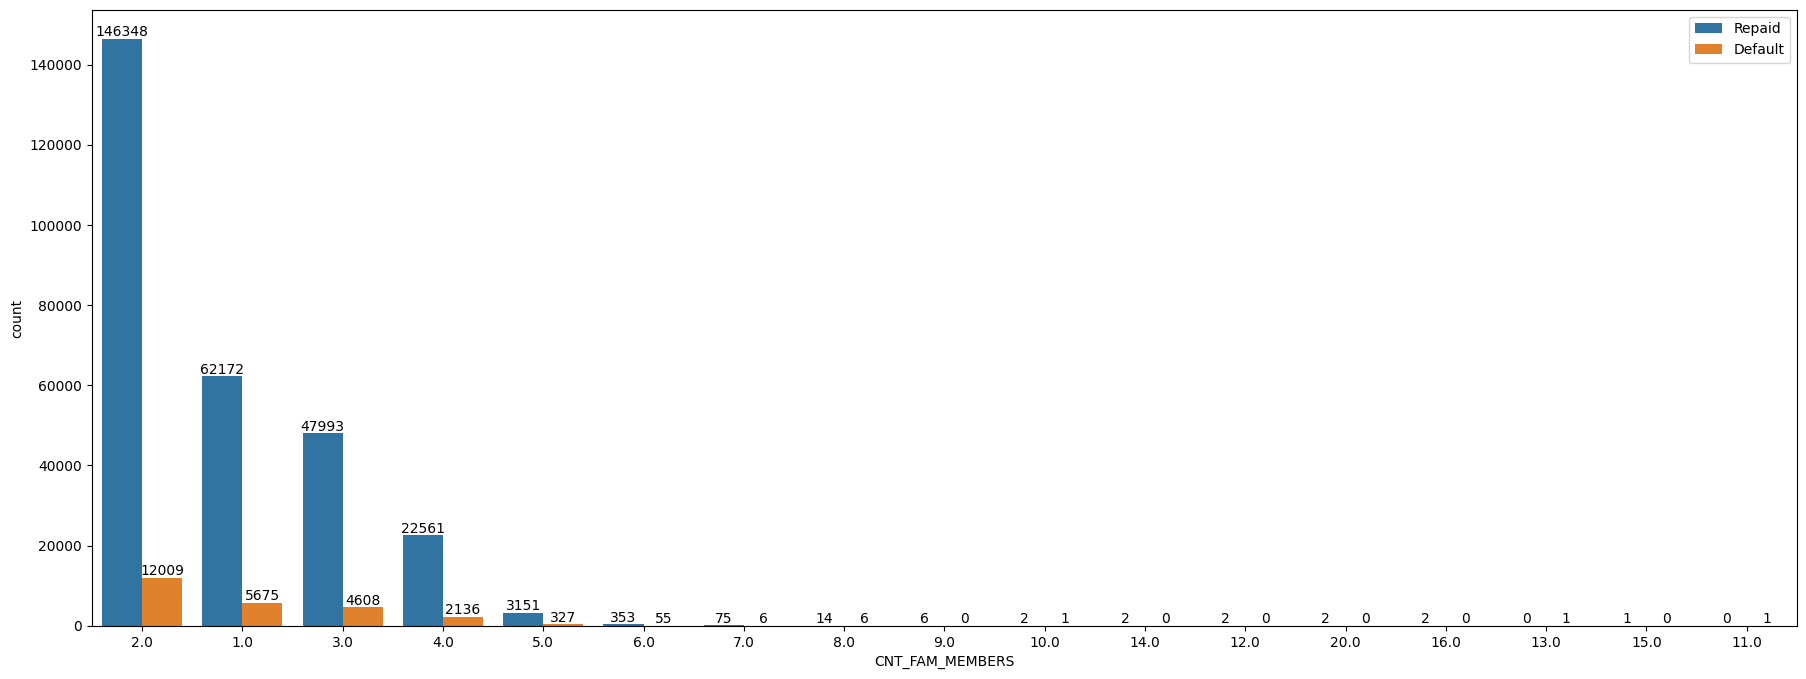

In [47]:
plot_feature_count(application_data, "CNT_FAM_MEMBERS", figsize = (22, 8))

### Family members follow the same trend as the number of children, as they are very correlated. 

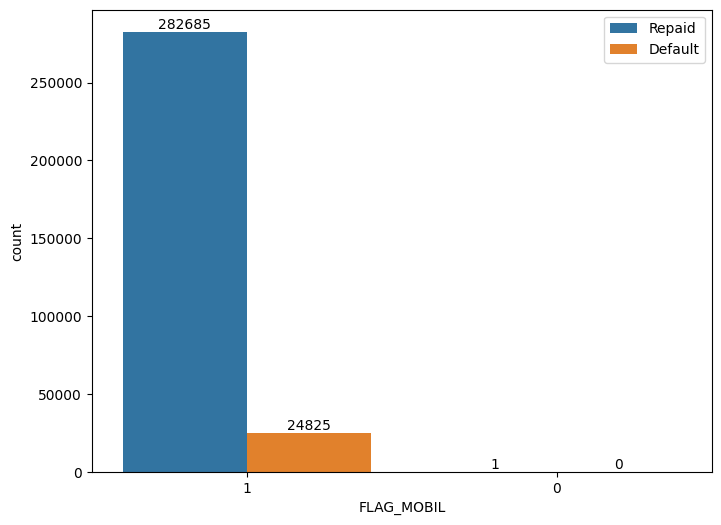

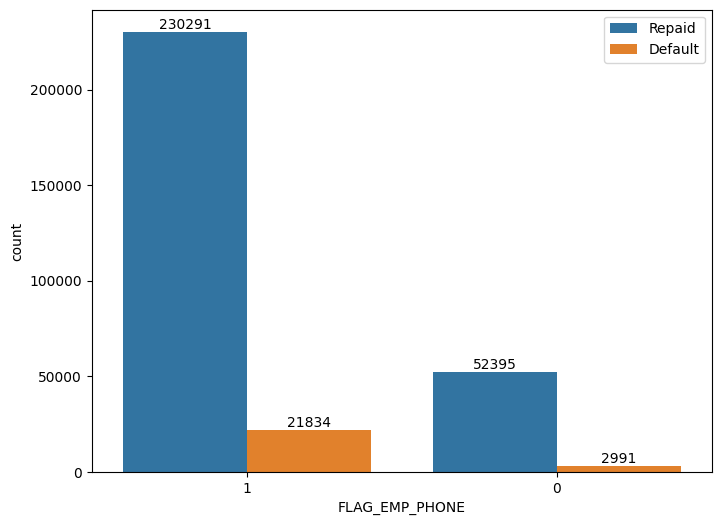

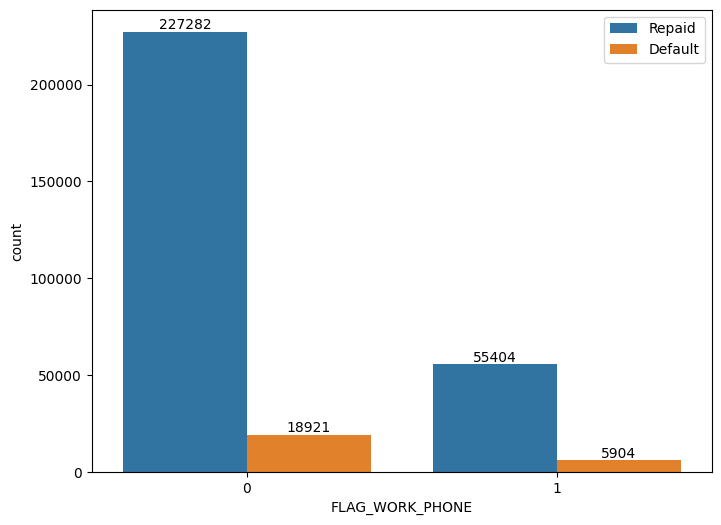

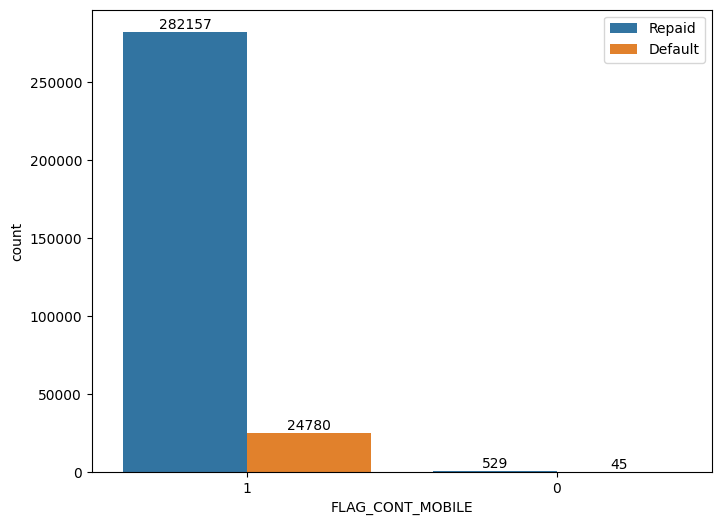

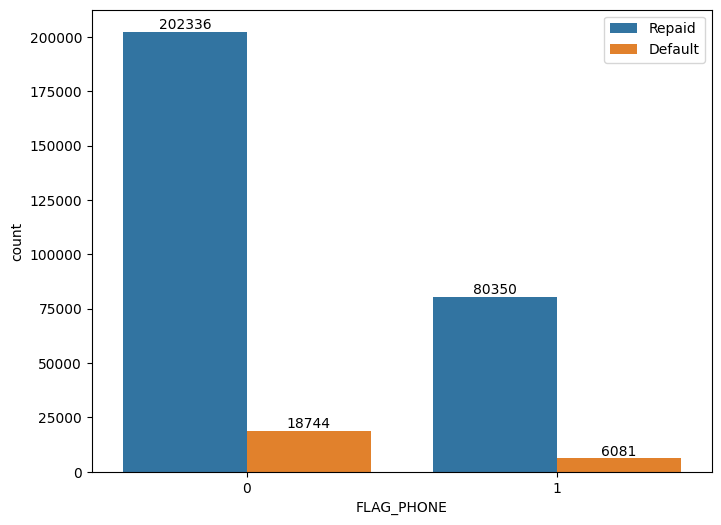

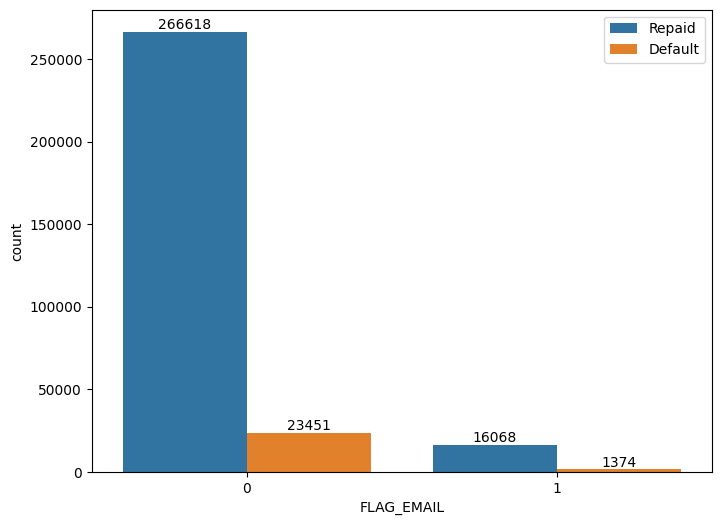

In [48]:
for feature in application_data.columns:
    if "FLAG" in feature and ("MOBIL" in feature or "PHONE" in feature or "EMAIL" in feature):
        plot_feature_count(application_data, feature)

### Almost all applicants provided a mobile phone number and their number was reachable. 

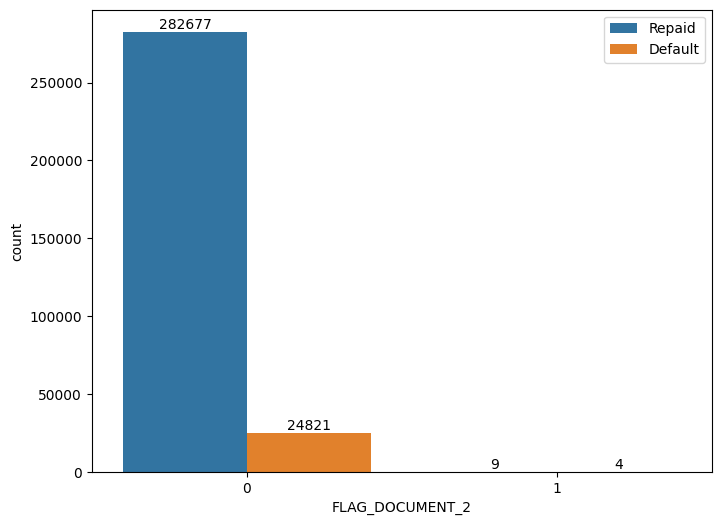

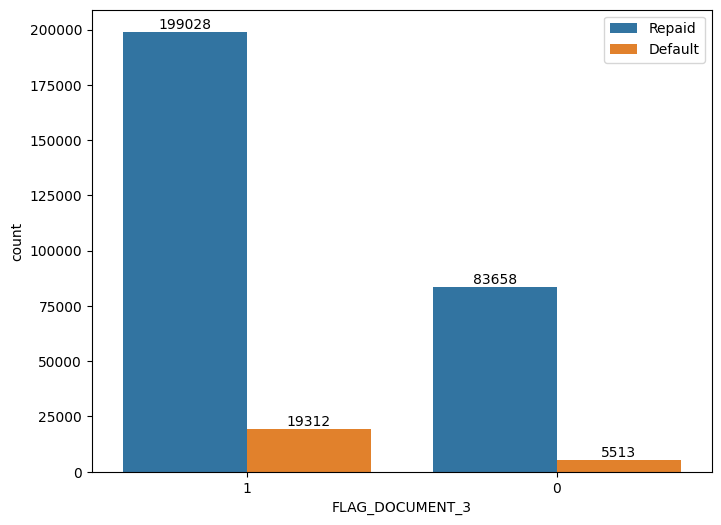

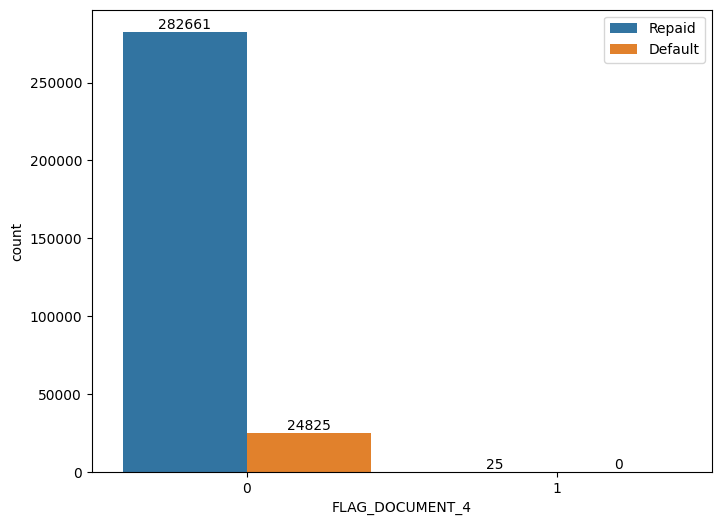

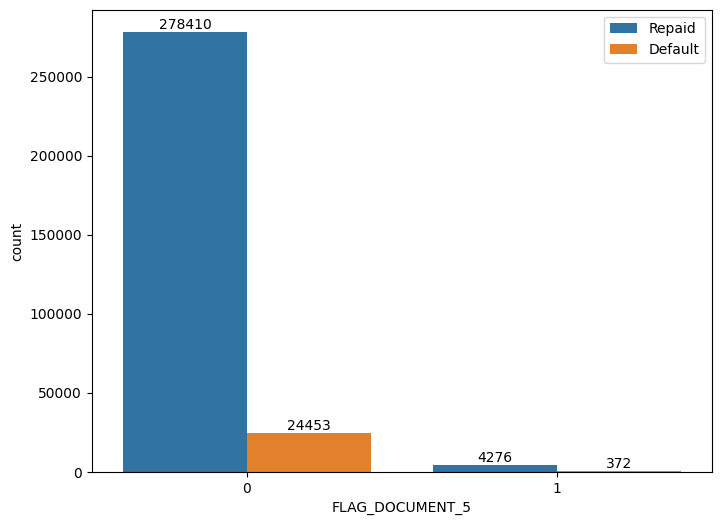

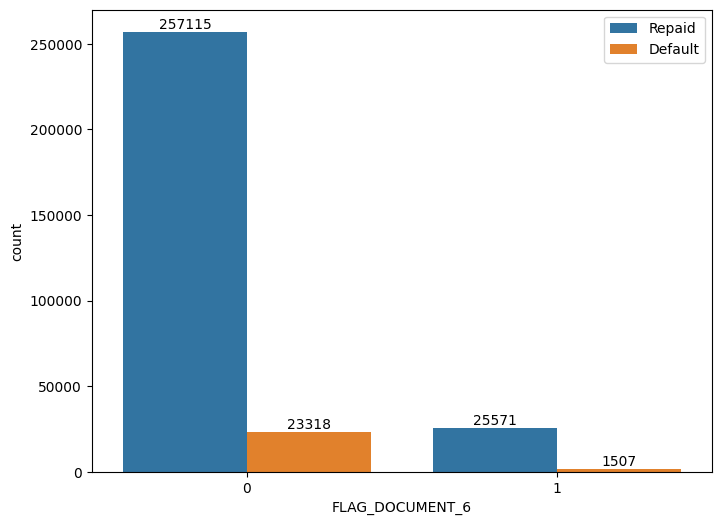

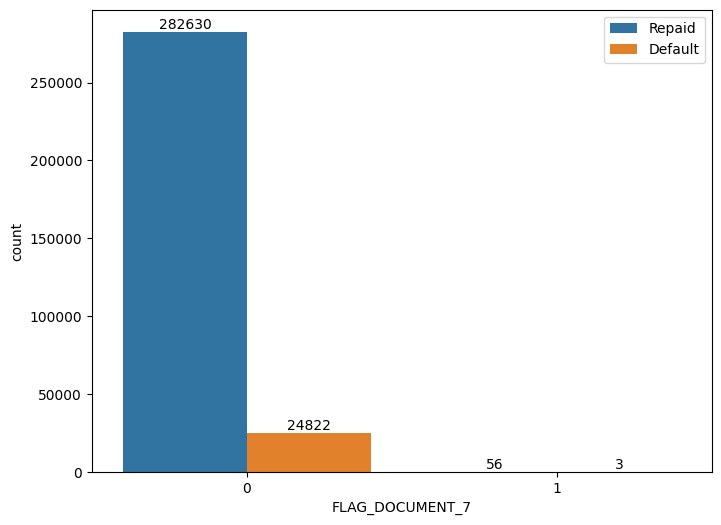

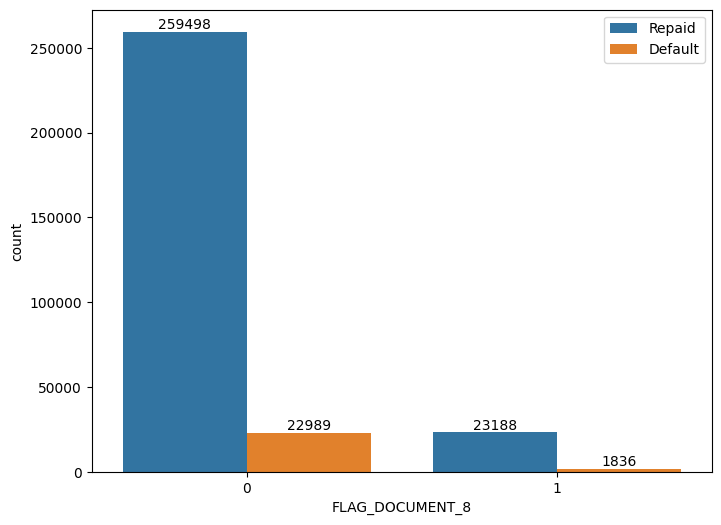

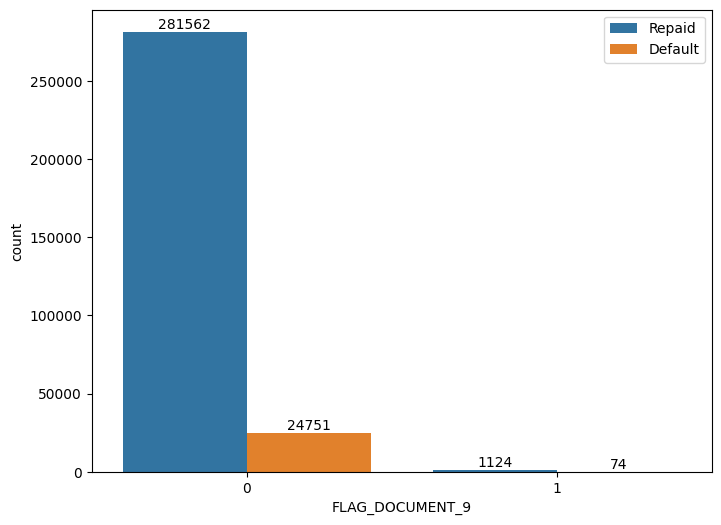

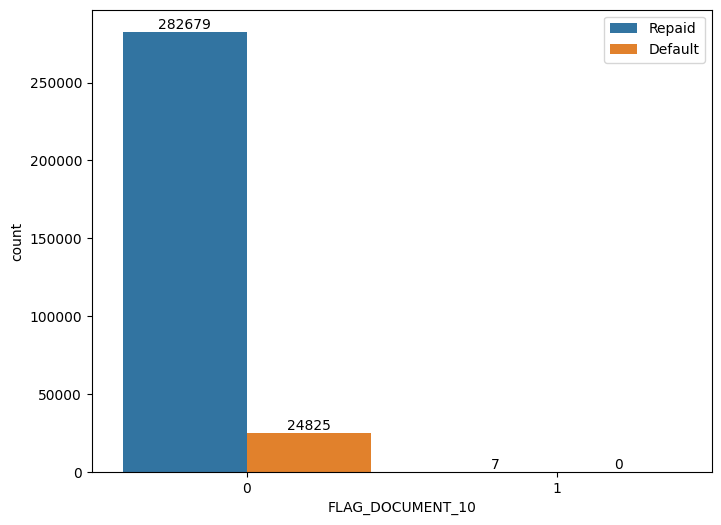

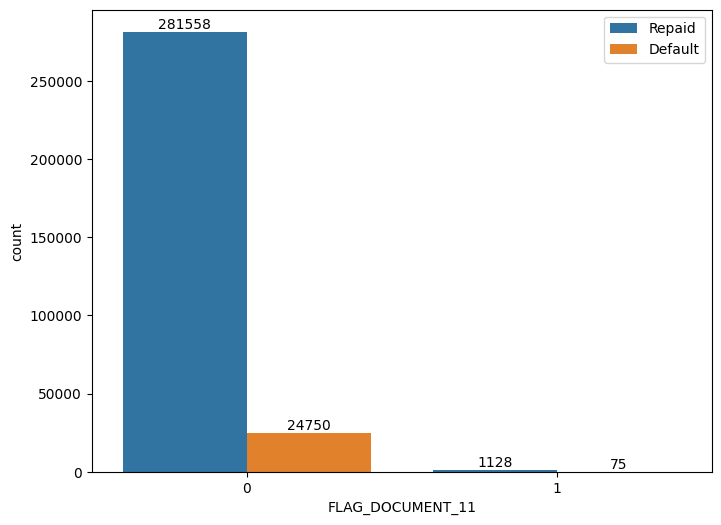

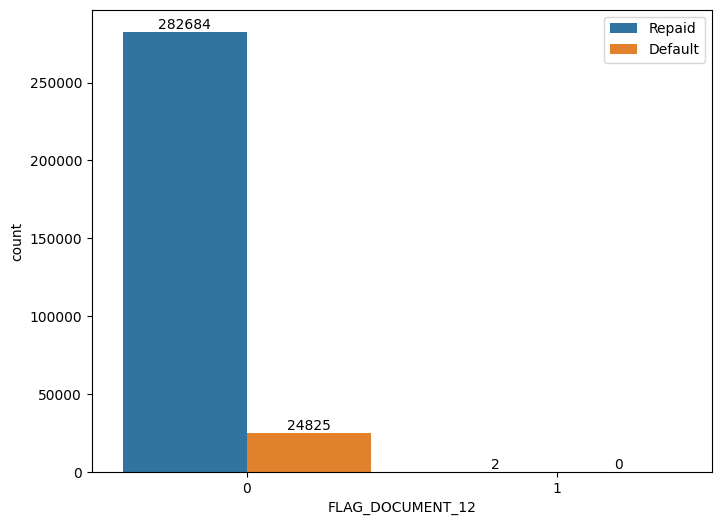

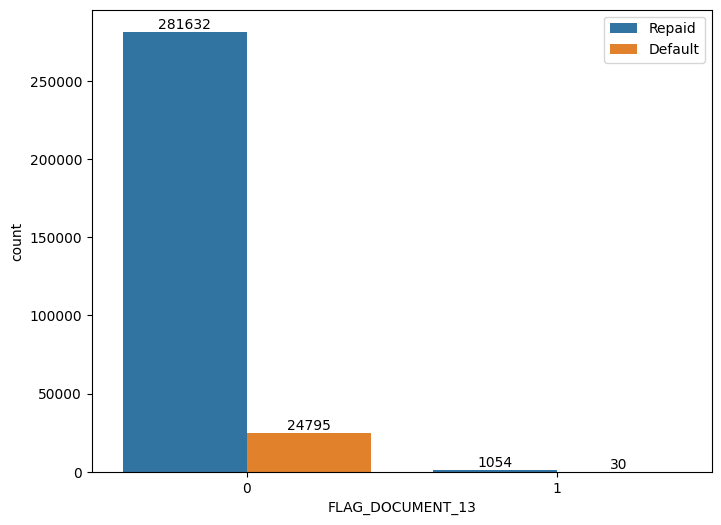

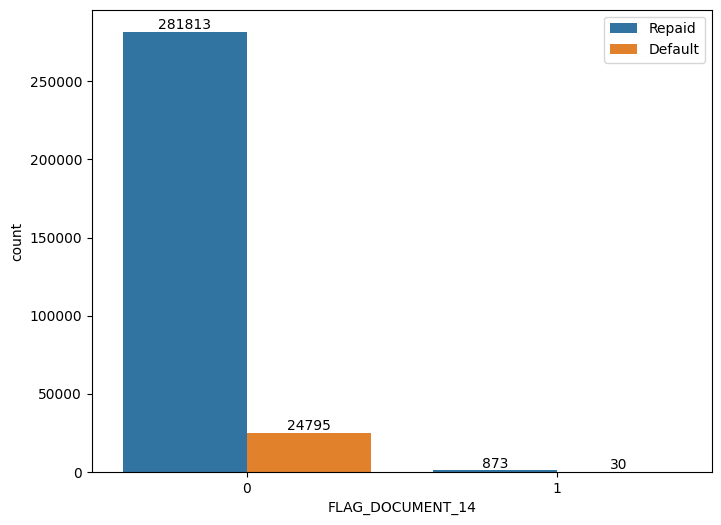

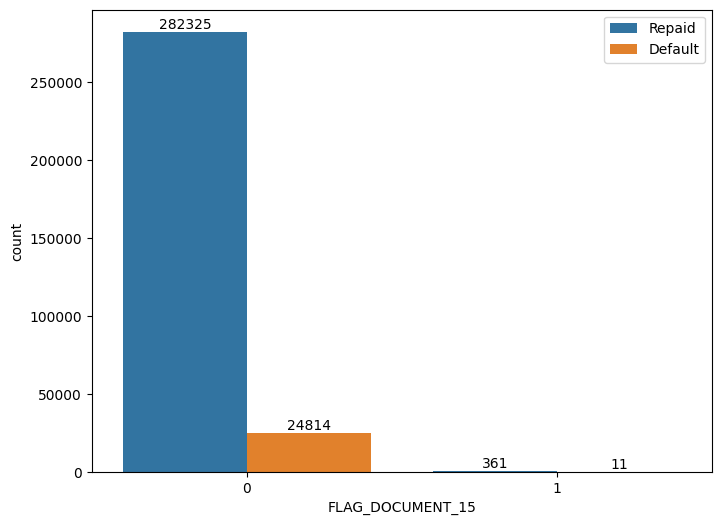

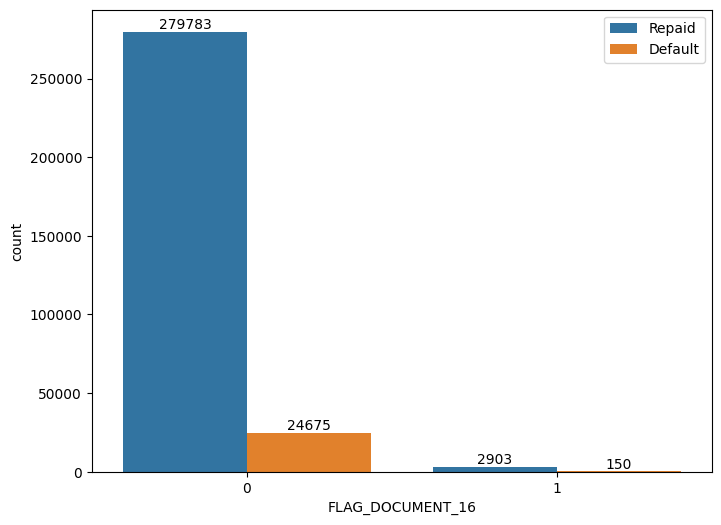

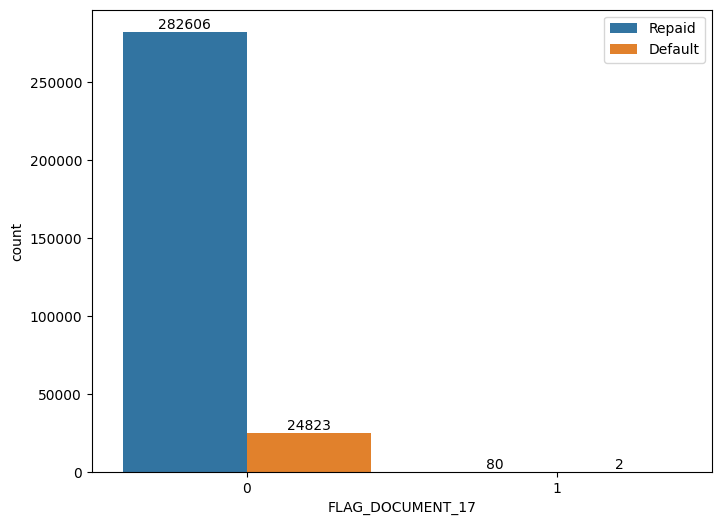

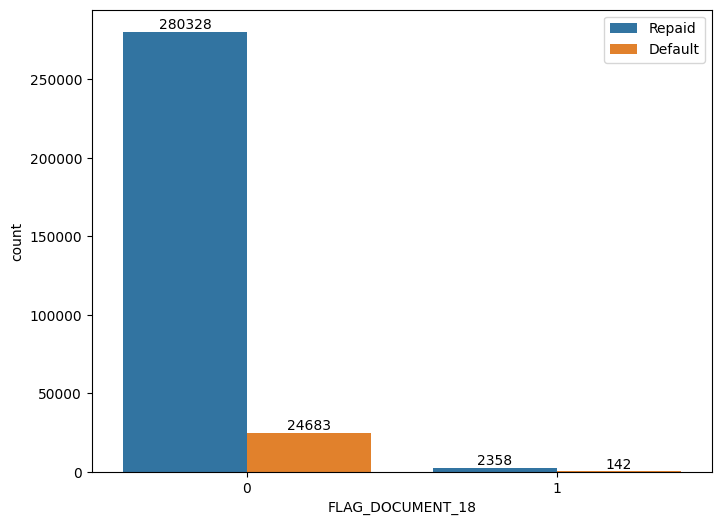

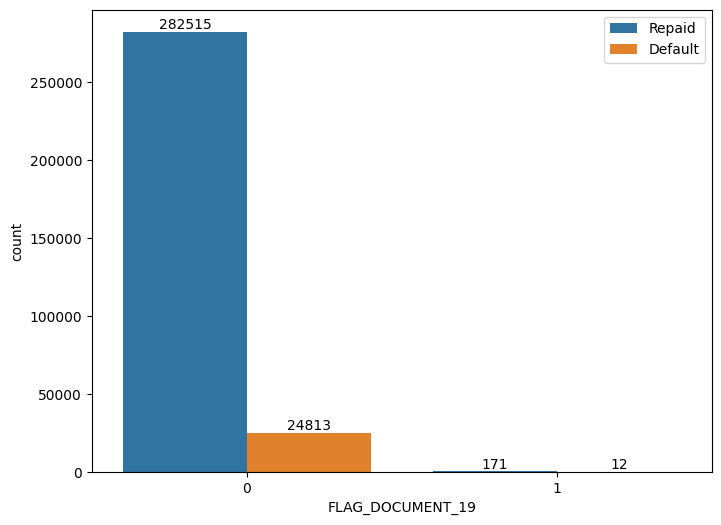

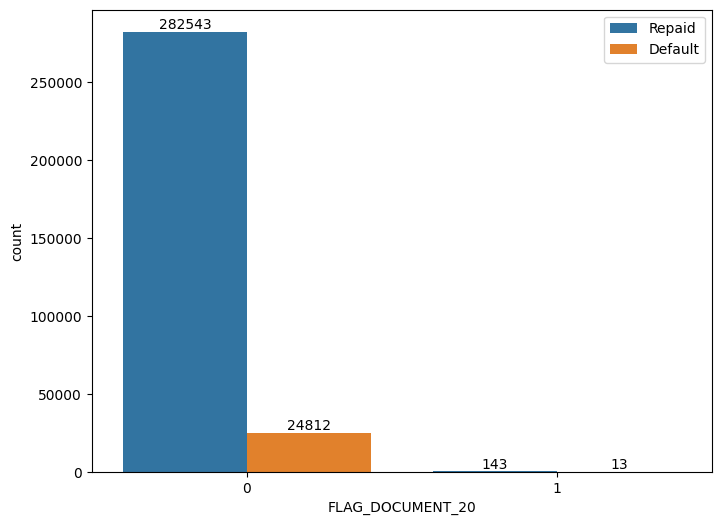

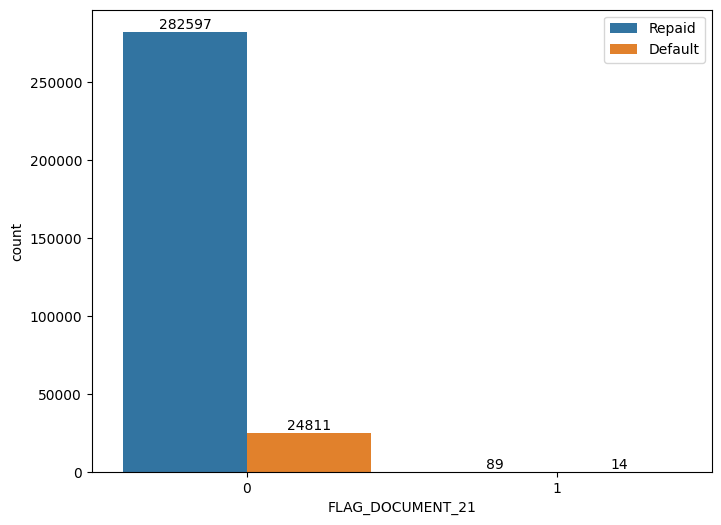

In [49]:
for i in range(2, 22):
    plot_feature_count(application_data, f"FLAG_DOCUMENT_{i}")

### Almost all applicants don't provide any of these documents (except 3,5,6 and 8)
### It might be better to not consider these documents as they don't provide helpful information about the applicants default rate. 

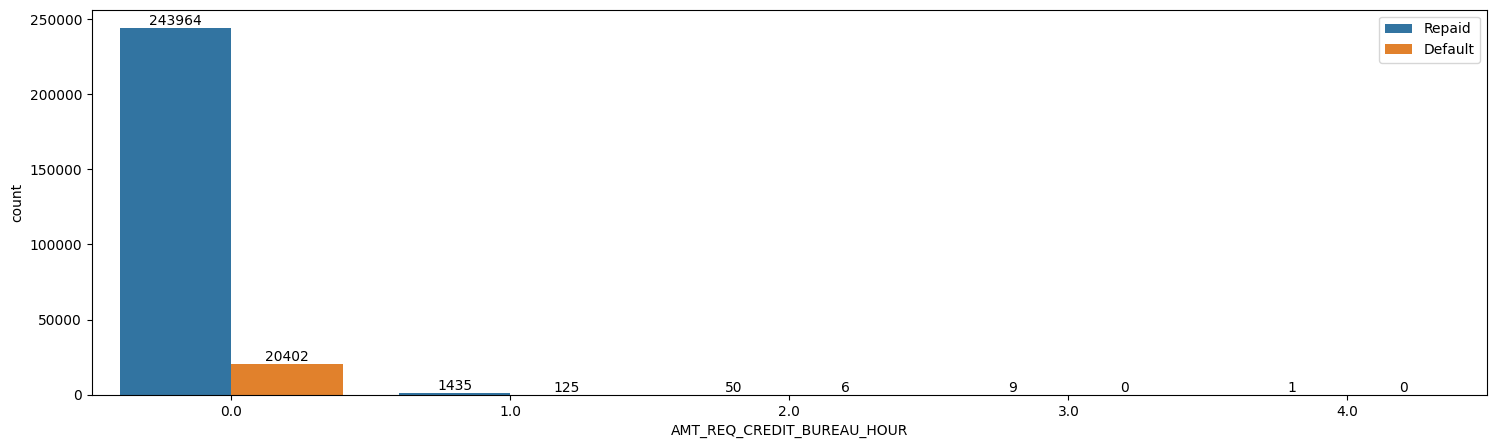

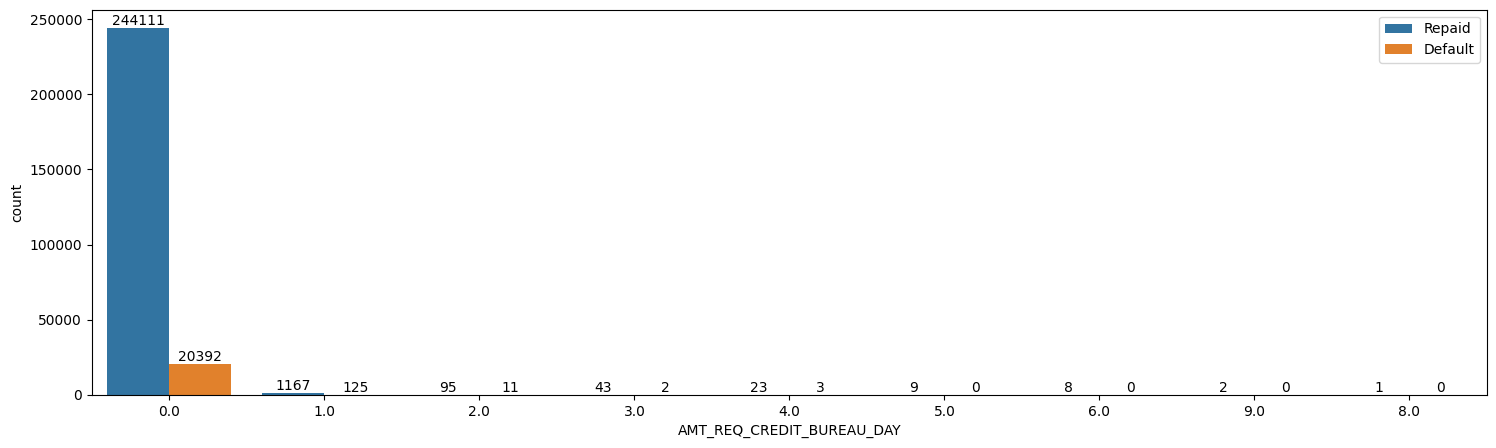

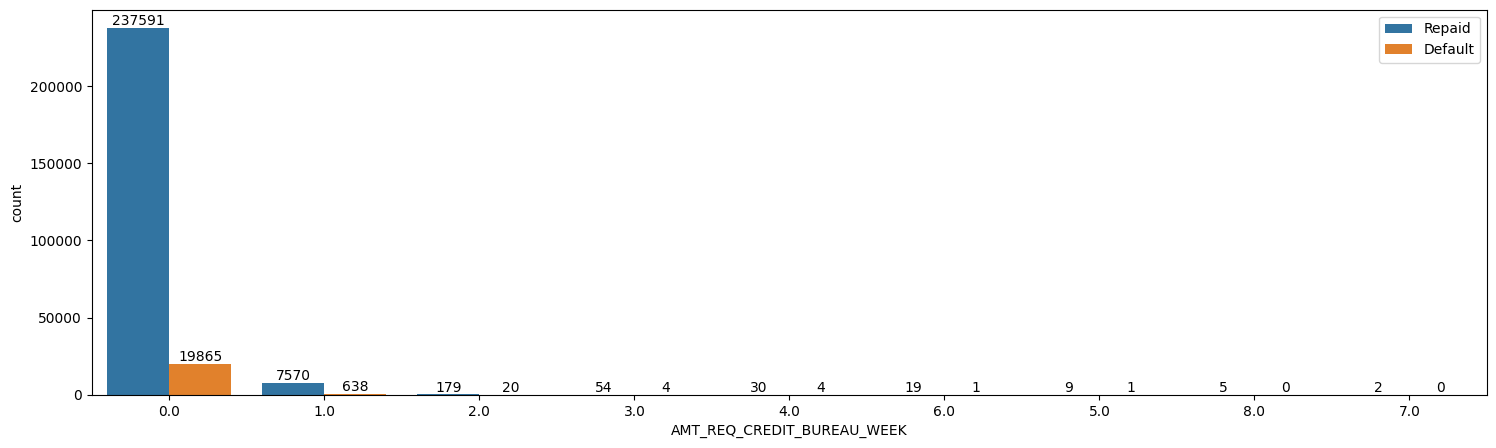

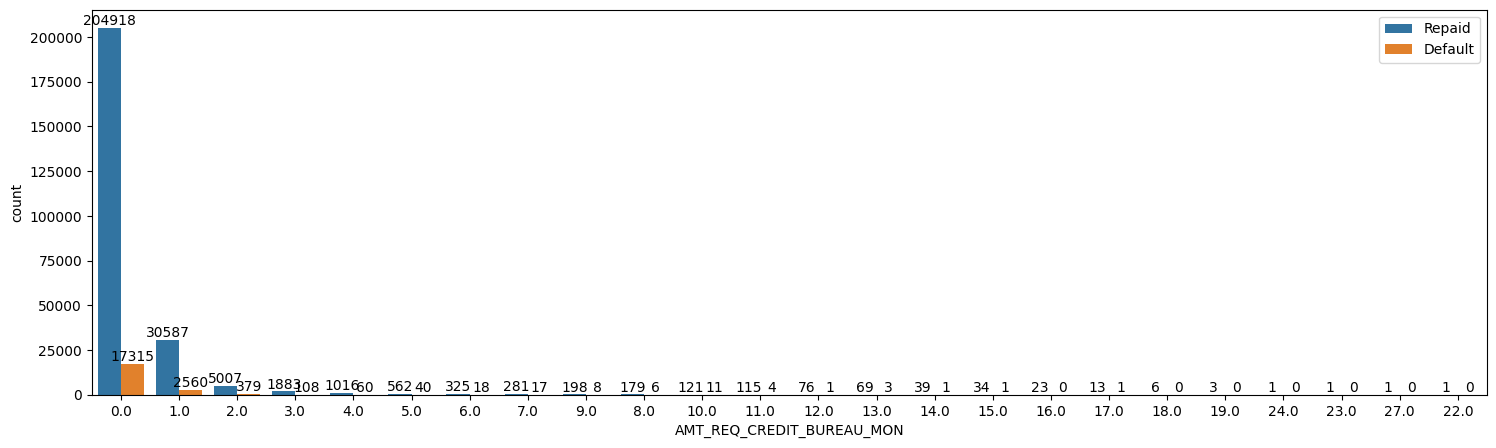

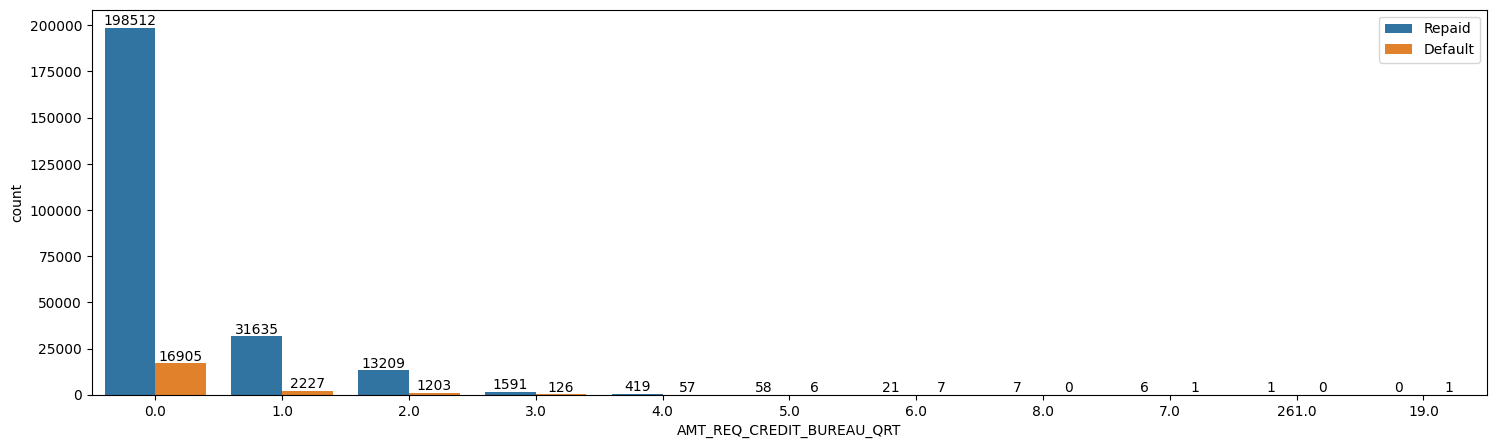

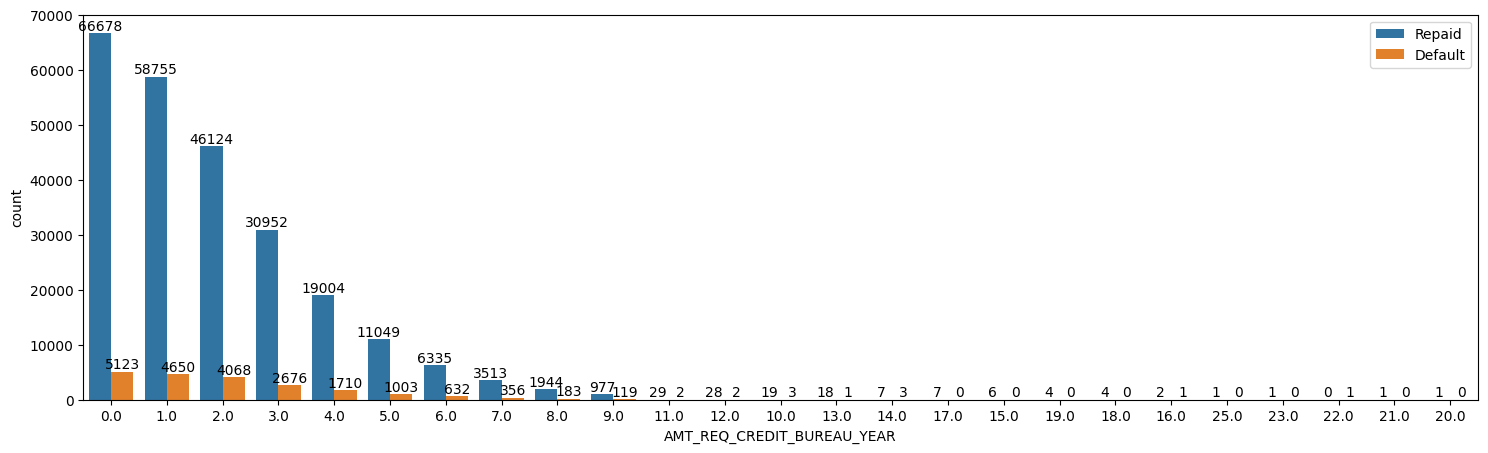

In [50]:
for feature in ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
    plot_feature_count(application_data, feature, figsize = (18, 5))

### AMT_REQ_CREDIT_BUREAU_X: Number of enquiries to Credit Bureau about the client X time before application.
### Based on the available data, in the week before an application is submitted, There were no enquiries made to the Credit Bureau for almost all applicants. 

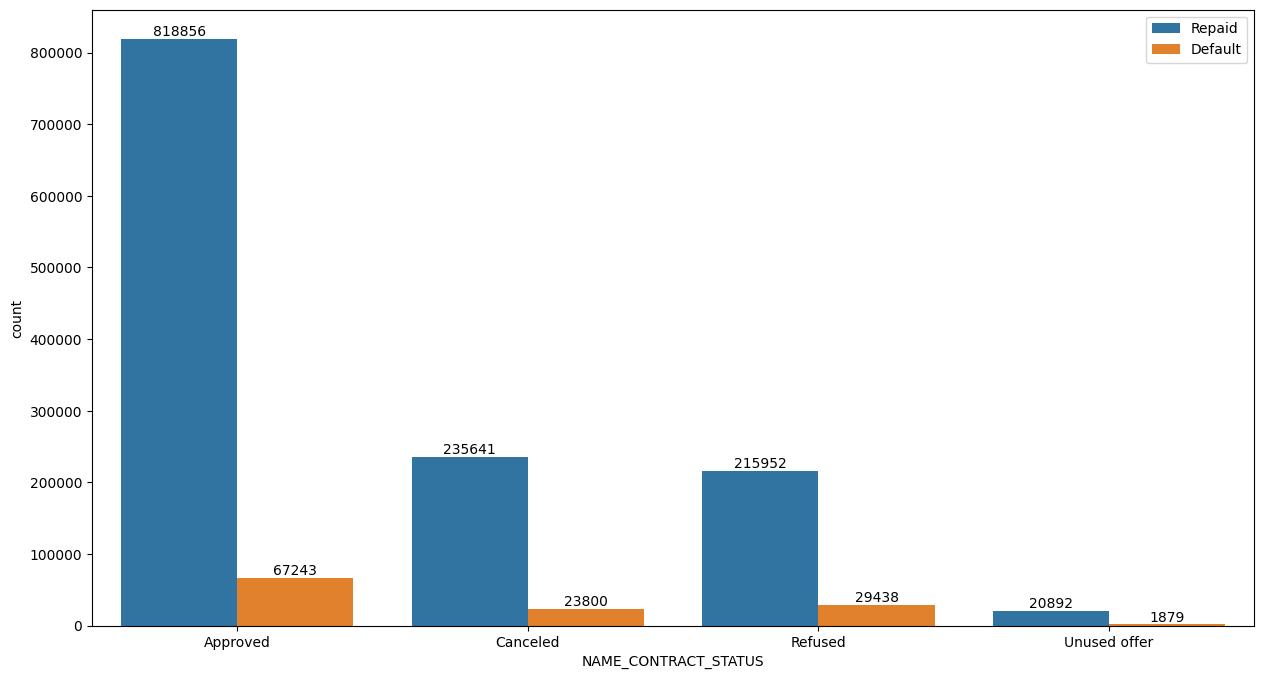

In [51]:
plot_feature_count(loans_df, "NAME_CONTRACT_STATUS", "TARGET", figsize = (15, 8))

### Most applicants who have previously canceled a loan or have been denied a loan are repaying the current loan.
### Having more information about the reason of cancelation or refusal could lead to converting more repaying applicants in the future. 

In [52]:
previous_application["application_credit_difference"] = previous_application["AMT_APPLICATION"] - previous_application["AMT_CREDIT"]

print(f"applications where client received more credit that what was applied for = {len(previous_application[previous_application['application_credit_difference'] > 0]) / len(previous_application):.2%}")
print(f"applications where client received less credit that what was applied for = {len(previous_application[previous_application['application_credit_difference'] < 0]) / len(previous_application):.2%}")
print(f"applications where client received the same credit as what was applied for = {len(previous_application[previous_application['application_credit_difference'] == 0]) / len(previous_application):.2%}")

applications where client received more credit that what was applied for = 21.42%
applications where client received less credit that what was applied for = 39.37%
applications where client received the same credit as what was applied for = 39.21%


### 78.58% of applicants receive the same credit or less than what they applied for. 

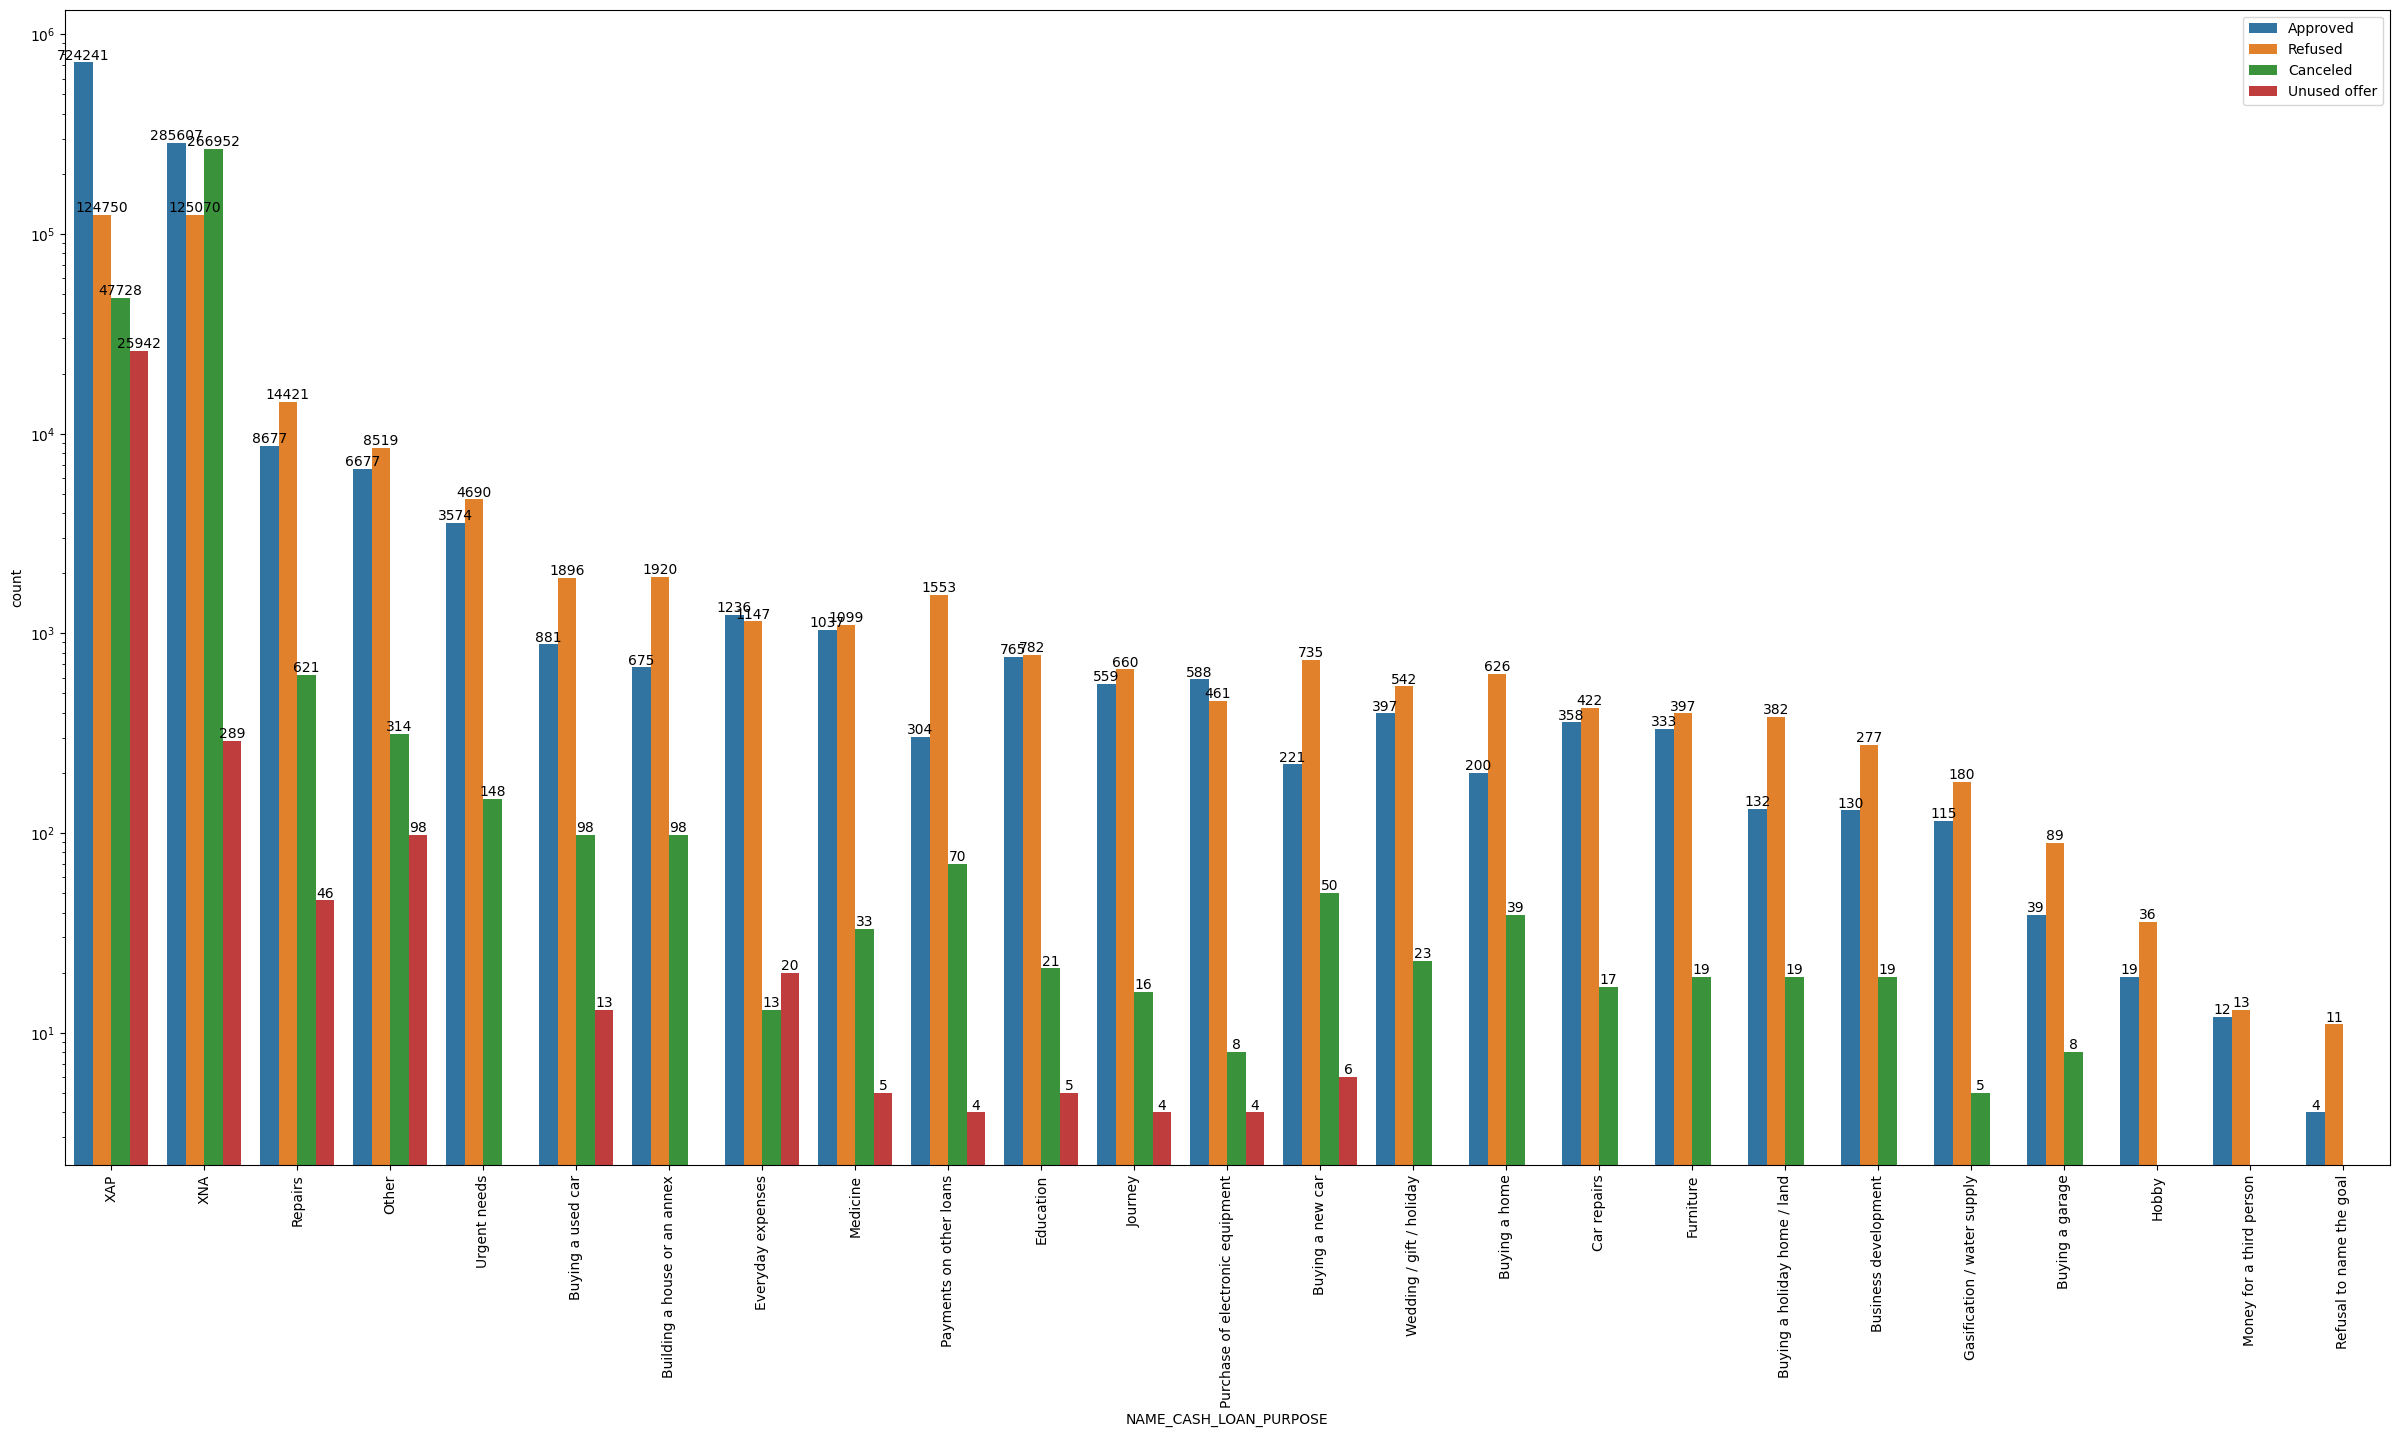

In [53]:
plot_feature_count(previous_application, "NAME_CASH_LOAN_PURPOSE", "NAME_CONTRACT_STATUS", 
                   rot = 90, 
                   logy = True, 
                   figsize = (30, 15), 
                   legend_labels = previous_application["NAME_CONTRACT_STATUS"].unique().tolist())

### A large number of previous loans has an unknown purpose.
### Loans taken for the purpose of Repairs have a high cancelation rate by the applicants, possibly due to having higher interest rate.
### Loans taken for the purpose of paying other loans have a high chance of being refused by bank, possibly because such applicants have a higher chance of default and are thus considered a higher risk. 

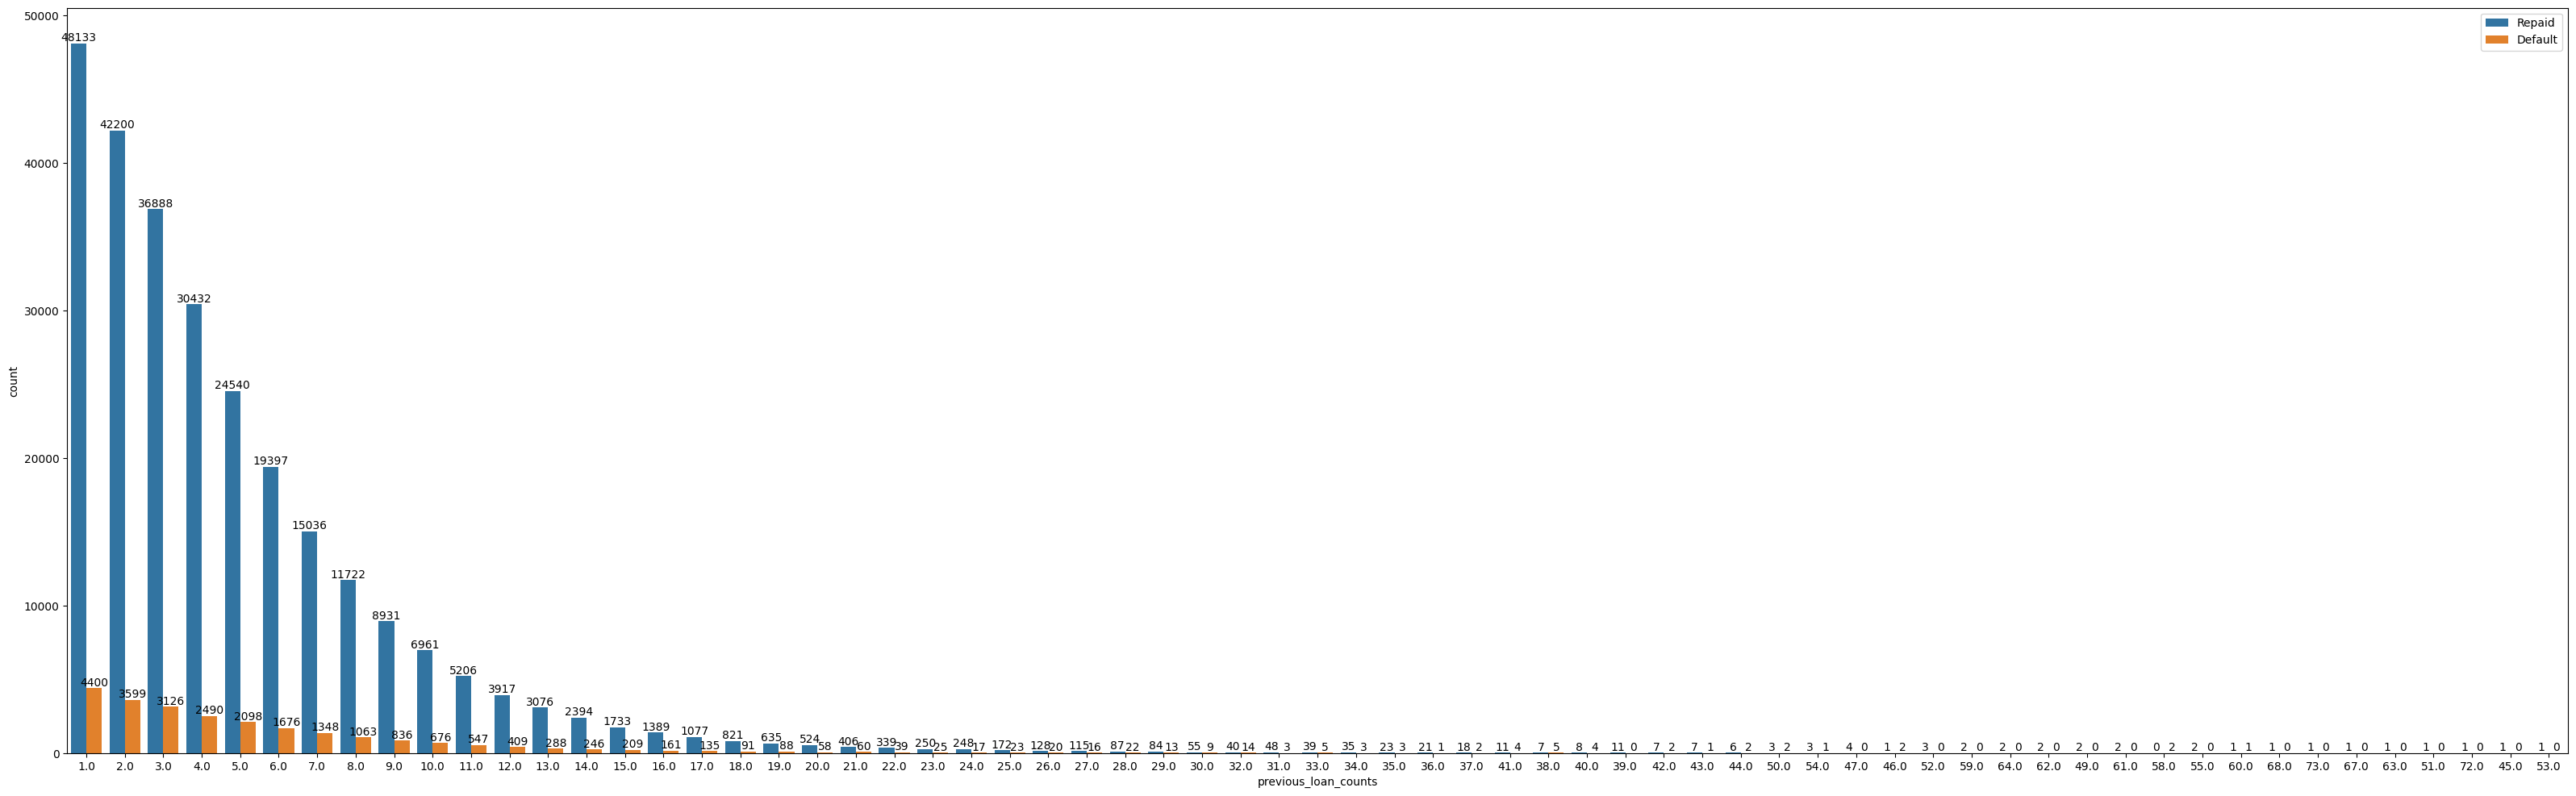

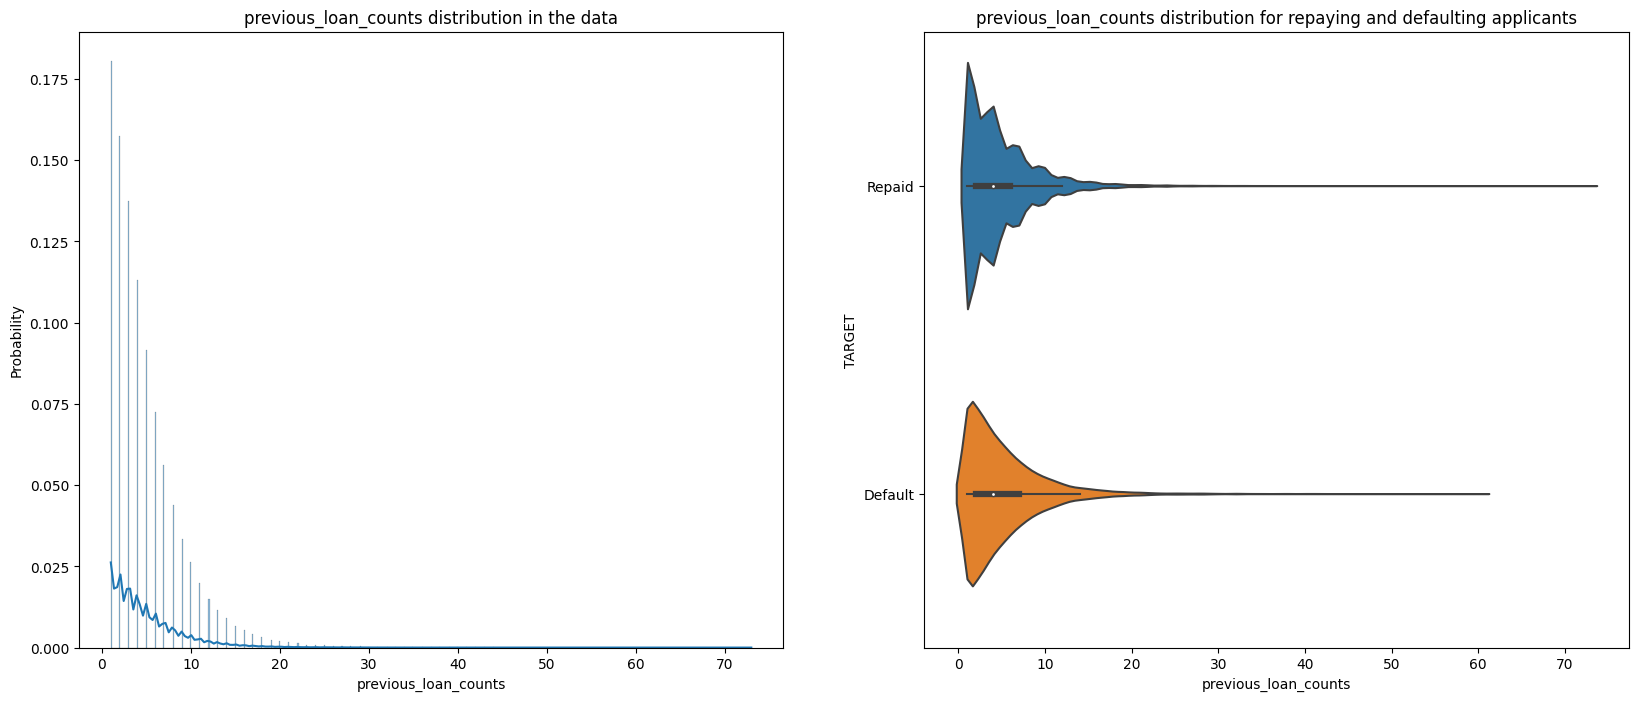

In [54]:
n_previous_applications = (previous_application.groupby("SK_ID_CURR", as_index=False)
                                      .agg({"SK_ID_PREV":"count"})
                                      .rename(columns = {'SK_ID_PREV': 'previous_loan_counts'})
                                      .merge(application_data[["SK_ID_CURR","TARGET"]], 
                                             how="right", 
                                             on="SK_ID_CURR"))

plot_feature_count(n_previous_applications, "previous_loan_counts", "TARGET", figsize = (40, 12))
plot_numerical_feature(n_previous_applications, "previous_loan_counts")

In [55]:
get_null_percentage(n_previous_applications)

SK_ID_CURR              0.000000
previous_loan_counts    5.350703
TARGET                  0.000000
dtype: float64

### Around 95% of current applicant in the data have at least one previous application for a loan.
### For all loan counts with sufficiently large number of samples, the ratio between defaulting and paying applicants is around 10%. This may suggest that the number of previous loans may not be correlated with the TARGET variable. 

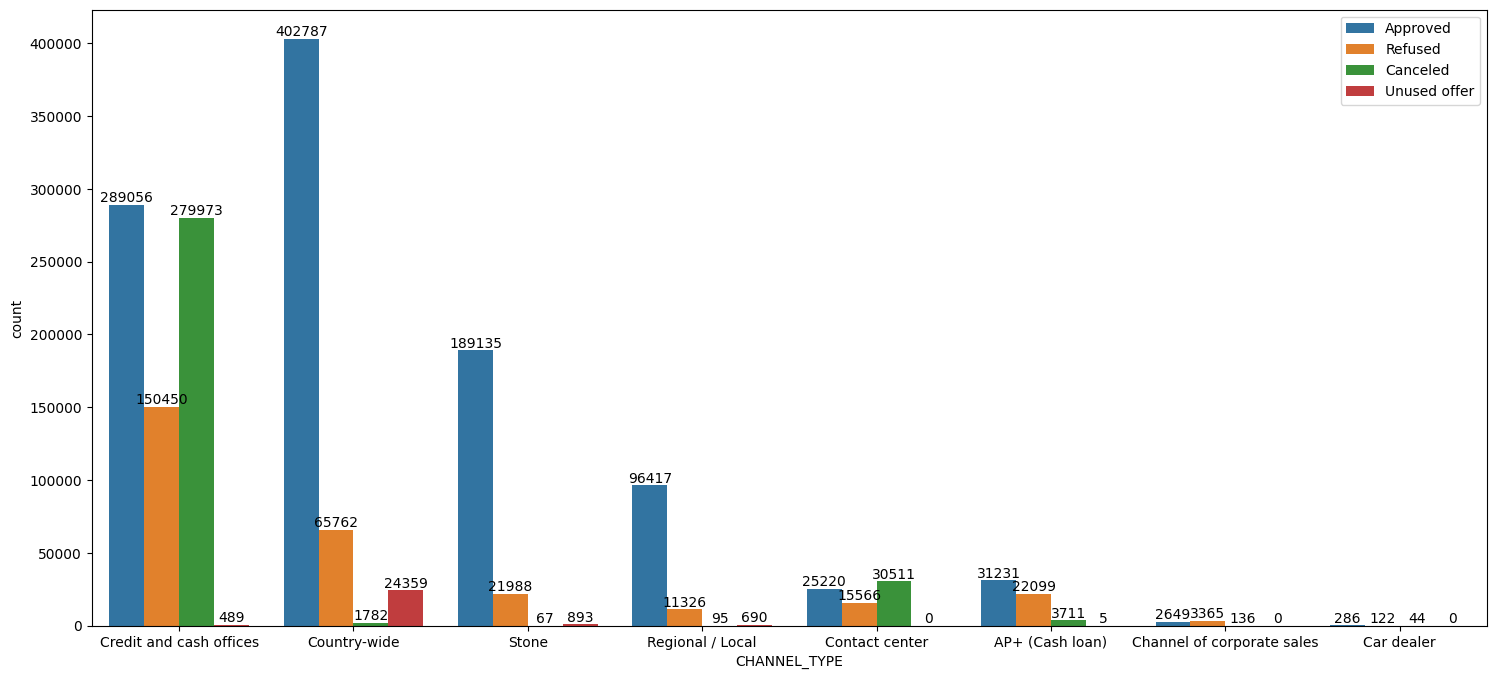

In [56]:
plot_feature_count(previous_application, "CHANNEL_TYPE", "NAME_CONTRACT_STATUS", 
                   logy = False, 
                   figsize = (18, 8), 
                   legend_labels = previous_application["NAME_CONTRACT_STATUS"].unique().tolist())

### Previous applications aquired through the Country-wide channel have the highest approval rate. 

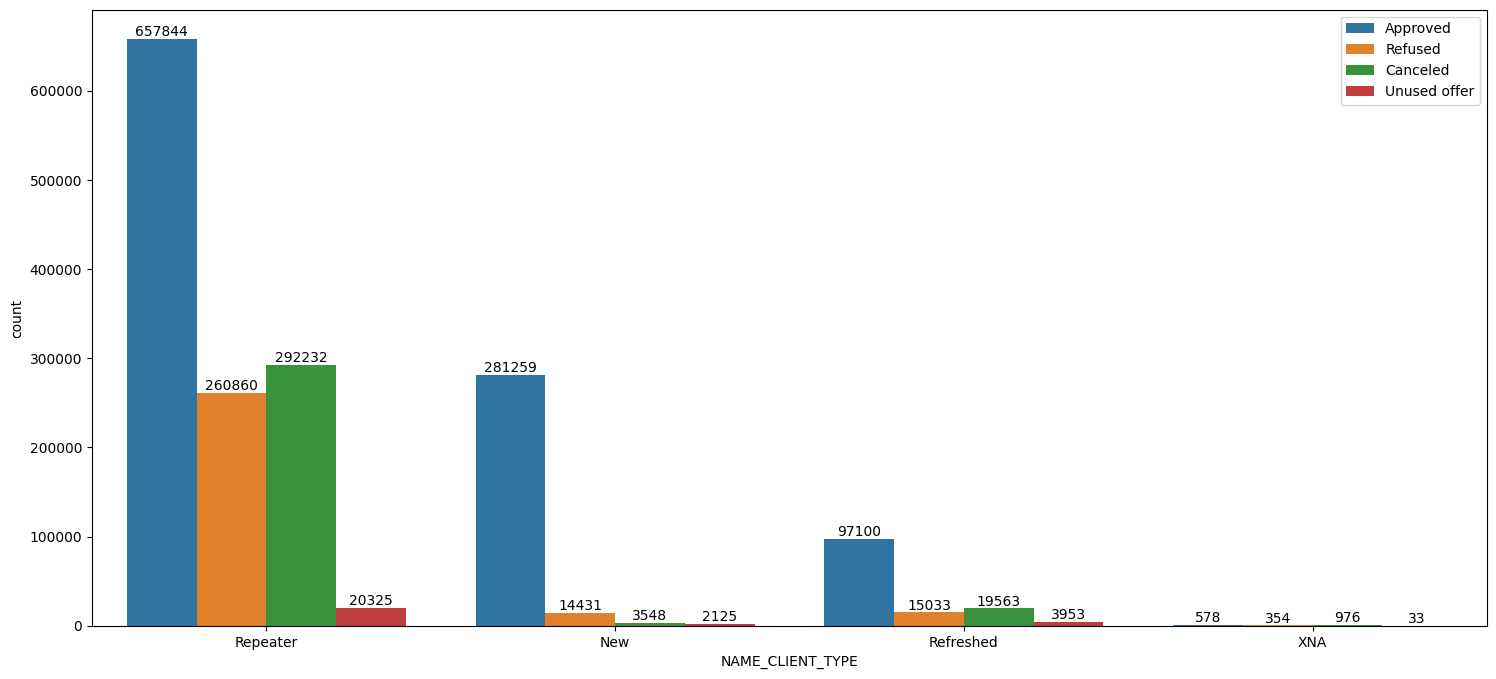

In [57]:
plot_feature_count(previous_application, "NAME_CLIENT_TYPE", "NAME_CONTRACT_STATUS", 
                   logy = False, 
                   figsize = (18, 8), 
                   legend_labels = previous_application["NAME_CONTRACT_STATUS"].unique().tolist())

### In the previous applications, most first-time applicants were approved. This is likely because these applicants' credit scores are still in a good condition.
### The probability of refusal increases in the case of repeater applicant. 

# [ Analysis insights ]

## Applicant who are less likely to default:

### Female Applicants.

#### 1.Applicants residing in a region with rating 1.
#### 2.Applicants with academic degrees.
#### 3.Applicants with very high income (700k +).
#### 4.Applicants who are working as accountants.
#### 5.Applicants that have EXT_SOURCE_3 score > 0.5.
#### 6.Applicants who are more likely to default:

### Male Applicants.

#### 1.Applicants with Lower Secondary education.
#### 2.Applicants residing in a region with rating 3.
#### 3.Applicants with a credit amount above 3 millions.
#### 4.Applicants who are working as low-level Labourers.
#### 5.Applicants that have EXT_SOURCE_2 score < 0.4

### Other notes:

#### Having more information about the reason of cancelation or refusal of previous loans could lead to converting more repaying applicants in the future.

# [ Data preprocessing ]

### Based on our previous analysis, there are many problems that must be handled during preprocessing:

#### 1.Missing values.
#### 2.Features with skewed distributions and many outliers.
#### 3.Redundant features (mostly consist of a single value, or highly correlated with other features).
#### 4.High dimensionality (large number of features).

### Dealing with missing values will be done using 4 strategies:

#### 1.Features with more than 40% missing values are removed.
#### 2.Categorical features will have a new unique category that will indicate a missing value (missingness encoding). Missing categorical features may provide helpful information about the target. Therefore, replacing them with one of the existing categories may lead to losing this information.
#### 3.Continuous features are filled with its median due to its skewed distribution.
#### 4.Discrete features are filled with its mode.



# Some more details regarding data and how to overcome any irregularities

### 1.Skewed feature distributions and outliers will be handled by using Tree-based models. Such models are non-parametric and hence have no assumptions about the data. They also are not affected by data scale or outliers, which makes them a suitable candidate for this problem.

### 2.Categorical features are encoded using LabelEncoder. Since tree model are not affected by feature values scale, there is no need to use One-hot encoding. This will also help keep the data dimensionality low.

### 3.Redundant features such as FLAG_DOCUMENT that mostly consist of a single value, and features that are highly correlated with other features will be dropped.

### 4.For feature engineering, We'll construct 4 new features from the previous_application.csv dataset that, for each applicant, indicate the number of previous applications that were approved/refused/canceled/unused.

### 5.To reduce the dataset dimensionality, the training data will be fitted to a random forest classifier. Then, based on its feature importance scores, any feature with a low score will be dropped. This helps us remove uninformative features and reduce training time, which, in turn, facilitates hyperparameter tuning.

### 6.The dataset is split into 3 stratified samples: train, validation, and testing sets with a ratio of (8:1:1), respectively.

In [85]:
from typing import Any

In [59]:
apps_df_clean = application_data.copy()
targets = application_data["TARGET"]

apps_df_clean.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461          637.0             3648.0   
1                    0.003541      -16765         1188.0             1186.0   
2                    0.010032      -19046          225.0             4260.0   
3                    0.008019      -19005         3039.0             9833.0   
4                    0.028663      -19932         3038.0             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [60]:
# All features with `days since` format are negative, let's make them positive:
for feature in apps_df_clean.columns:
    if "DAYS" in feature:
        apps_df_clean[feature] = abs(apps_df_clean[feature])

In [61]:
# Generate new features from `NAME_CONTRACT_STATUS`: how many previous applications were approved/refused/canceled/unused:
prev_application_status = previous_application[["SK_ID_CURR","NAME_CONTRACT_STATUS"]]
prev_application_status = pd.get_dummies(prev_application_status, 
                                         columns = ["NAME_CONTRACT_STATUS"], 
                                         prefix = "Previous_application")
prev_application_status = prev_application_status.groupby("SK_ID_CURR").sum()
prev_application_status.sample(5)

Previous_application_Approved  Previous_application_Canceled  \
SK_ID_CURR                                                                 
305562                                  3                              1   
207547                                  3                              0   
152105                                  1                              0   
297341                                  3                              0   
122237                                  3                              0   

            Previous_application_Refused  Previous_application_Unused offer  
SK_ID_CURR                                                                   
305562                                 0                                  0  
207547                                 0                                  0  
152105                                 0                                  0  
297341                                 0                                  0  
122237                                 0                                  0

In [62]:
apps_df_clean = apps_df_clean.merge(prev_application_status, how = "left", on="SK_ID_CURR")
apps_df_clean.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
212626      346401       0         Cash loans           M            Y   
222494      357726       0         Cash loans           M            Y   
246099      384803       0         Cash loans           M            Y   
144327      267351       0         Cash loans           F            N   
95633       211023       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
212626               Y             0          247500.0    781920.0   
222494               N             0          360000.0   1305000.0   
246099               N             3          234000.0    225000.0   
144327               N             0          202500.0    315666.0   
95633                Y             0          157500.0    537322.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
212626      42417.0         675000.0   Unaccompanied  Commercial associate   
222494      38155.5        1305000.0   Unaccompanied  Commercial associate   
246099      12915.0         225000.0          Family         State servant   
144327      29079.0         292500.0   Unaccompanied             Pensioner   
95633       33003.0         486000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
212626  Secondary / secondary special            Married  House / apartment   
222494               Higher education            Married  House / apartment   
246099  Secondary / secondary special            Married  House / apartment   
144327               Higher education            Married  House / apartment   
95633   Secondary / secondary special              Widow  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
212626                    0.007330       12037          470.0   
222494                    0.072508       15437          782.0   
246099                    0.004960       16673         7353.0   
144327                    0.006207       22182            NaN   
95633                     0.019101       20300            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
212626             2413.0             4239          6.0           1   
222494             1101.0             3228          2.0           1   
246099             1371.0              221          6.0           1   
144327              987.0             3254          NaN           1   
95633              1054.0             3475          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
212626               1                0                 1           1   
222494               1                0                 1           1   
246099               1                0                 1           0   
144327               0                0                 1           1   
95633                0                0                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
212626           0             NaN              2.0                     2   
222494           0             NaN              2.0                     1   
246099           0      Core staff              5.0                     2   
144327           0             NaN              2.0                     2   
95633            0             NaN              1.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
212626                            2                     MONDAY   
222494                            1                    TUESDAY   
246099                            2                    TUESDAY   
144327                            2                   THURSDAY   
95633                             2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
212626            

In [63]:
# Dropping unnecessary features:
dropped_cols = applications_null_ratio[applications_null_ratio > 40].index.tolist() # Columns that have more than 40% missing values
dropped_cols += [f"FLAG_DOCUMENT_{i}" for i in range(2, 22) if i not in {3, 5, 6, 8}] + ["FLAG_MOBIL", "FLAG_CONT_MOBILE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK"] # Features that mosly consist of a single value.
dropped_cols += ["AMT_GOODS_PRICE", "CNT_CHILDREN", "DAYS_BIRTH"] # Highly correlated with other features.
dropped_cols += ["SK_ID_CURR", "TARGET"] # ID and target columns

print(f"number of dropped columns = {len(dropped_cols)}")

apps_df_clean.drop(columns = dropped_cols, inplace = True)
print(f"Dataframe shape after dropping the selected columns: {apps_df_clean.shape}")

number of dropped columns = 75
Dataframe shape after dropping the selected columns: (307511, 52)


In [64]:
# Fill missing values in NAME_TYPE_SUITE with "Unaccompanied".
apps_df_clean["NAME_TYPE_SUITE"] = apps_df_clean["NAME_TYPE_SUITE"].fillna("Unaccompanied")

#Fill missing values in OCCUPATION_TYPE with UNKNOWN.
apps_df_clean["OCCUPATION_TYPE"] = apps_df_clean["OCCUPATION_TYPE"].fillna("UNKNOWN")

#Fill missing values in DAYS_EMPLOYED with -1.
apps_df_clean["DAYS_EMPLOYED"] = apps_df_clean["DAYS_EMPLOYED"].fillna(-1)

#Fill missing values in approved/refused/canceled/unused offer with 0. (Such applicants have no previous applications in the dataset)
for feature in ["Approved", "Canceled", "Refused", "Unused offer"]:
    apps_df_clean[f"Previous_application_{feature}"] = apps_df_clean[f"Previous_application_{feature}"].fillna(0)

In [65]:
categorical_features = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE", 
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "WEEKDAY_APPR_PROCESS_START",
    "OCCUPATION_TYPE",
    "ORGANIZATION_TYPE"
]

for feature in categorical_features:
    apps_df_clean[feature] = apps_df_clean[feature].astype('category')

# Importing libraries related to model building

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [76]:
# Setup random seed for reproducibility
import random
seed = 42

random.seed(seed)
np.random.seed(seed)

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets with 8:1:1 ratio
X_train, X_test, y_train, y_test = train_test_split(apps_df_clean, targets, test_size=0.2, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed)


In [80]:
# Fill missing values in continuous columns with the median
continuous_cols_with_missing_vals = [
    "AMT_ANNUITY",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "DAYS_LAST_PHONE_CHANGE",
]

for X in (X_train, X_val, X_test):
    X.fillna({feature: X_train[feature].median() for feature in continuous_cols_with_missing_vals}, inplace = True)
    
# Fill missing values in discrete columns with the mode
discrete_cols_with_missing_vals = [
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "CNT_FAM_MEMBERS",
    "DAYS_EMPLOYED",
    "REGION_RATING_CLIENT_W_CITY",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
]


for X in (X_train, X_val, X_test):
    X.fillna({feature: X_train[feature].mode()[0] for feature in discrete_cols_with_missing_vals}, inplace = True)

print("Columns with missing values: \n",get_null_percentage(X_train)[get_null_percentage(X_train) > 0])

Columns with missing values: 
 Series([], dtype: float64)


In [81]:
# Encode categorical features using ordinal encoding
cat_encoder = OrdinalEncoder()
cat_encoder.fit(X_train[categorical_features])

for X in (X_train, X_val, X_test):
    X[categorical_features] = cat_encoder.transform(X[categorical_features])
    
X_train.sample(5)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
141890                 1.0          0.0           1.0              1.0   
297655                 0.0          0.0           0.0              1.0   
28544                  0.0          1.0           0.0              1.0   
45919                  0.0          1.0           1.0              1.0   
165797                 0.0          0.0           1.0              0.0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  NAME_TYPE_SUITE  \
141890           67500.0    180000.0       9000.0              6.0   
297655           67500.0    272520.0      16672.5              6.0   
28544           157500.0    132768.0       7330.5              6.0   
45919           247500.0    675000.0      53460.0              6.0   
165797          225000.0    594000.0      39856.5              6.0   

        NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
141890               7.0                  2.0                 1.0   
297655               3.0                  3.0                 1.0   
28544                1.0                  2.0                 2.0   
45919                7.0                  4.0                 1.0   
165797               7.0                  1.0                 1.0   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
141890                1.0                    0.020246         1076.0   
297655                1.0                    0.019689           -1.0   
28544                 1.0                    0.019101         1993.0   
45919                 1.0                    0.003541         4488.0   
165797                1.0                    0.020713        10449.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
141890             5507.0              867               1                0   
297655            10297.0             3417               0                0   
28544               269.0             4377               1                0   
45919               830.0             4453               1                1   
165797             7807.0             2427               1                0   

        FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
141890           1           0             17.0              2.0   
297655           0           0             17.0              2.0   
28544            0           0             16.0              1.0   
45919            1           0             17.0              2.0   
165797           1           0              3.0              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
141890                     3                            3   
297655                     2                            2   
28544                      2                            2   
45919                      1                            1   
165797                     3                            3   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
141890                         5.0                        9   
297655                         6.0                        9   
28544                          0.0                       10   
45919                          2.0                       11   
165797                         3.0                       12   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
141890                           0                           0   
297655                           0                           0   
28544                            0                           0   
45919                            0                           0   
165797                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
141890                            0                       0   
297655                            0                       0   
28544                             0                       0   
45919          

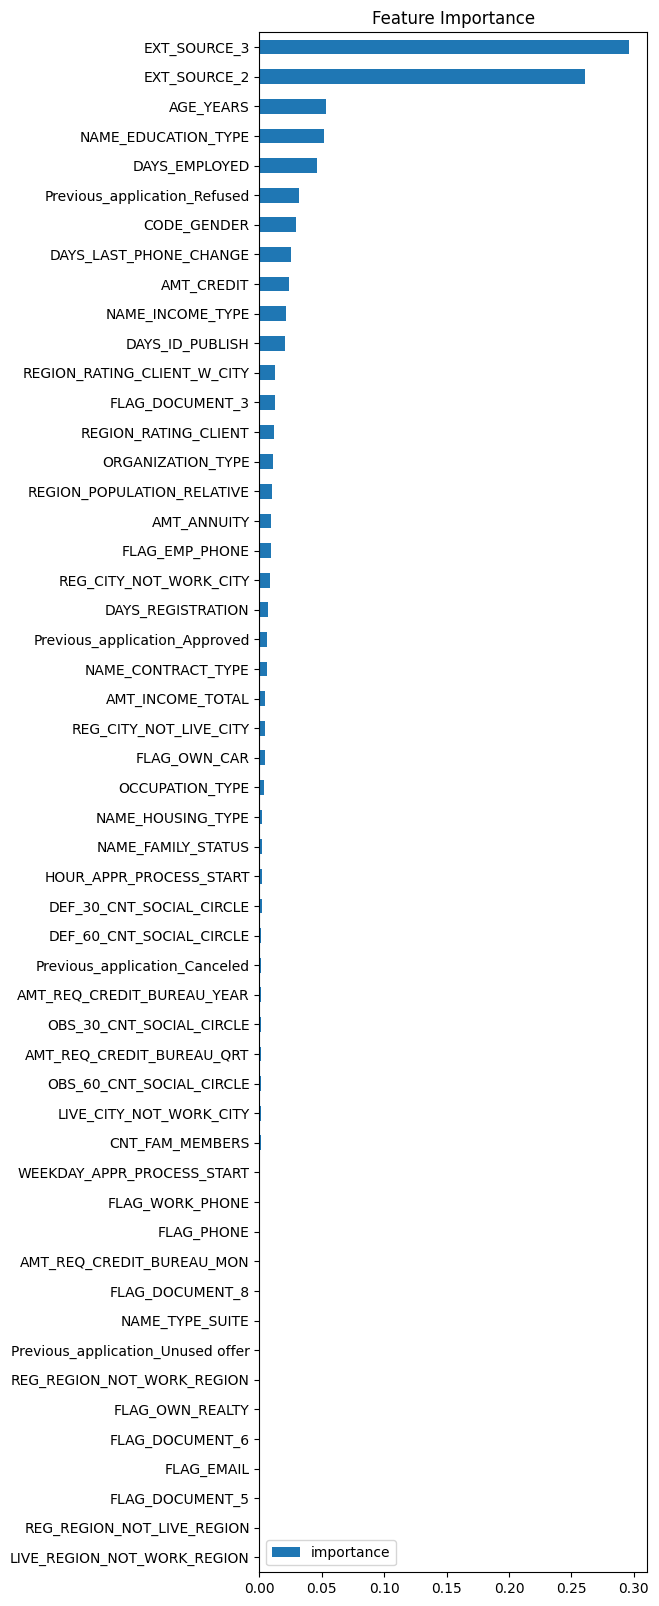

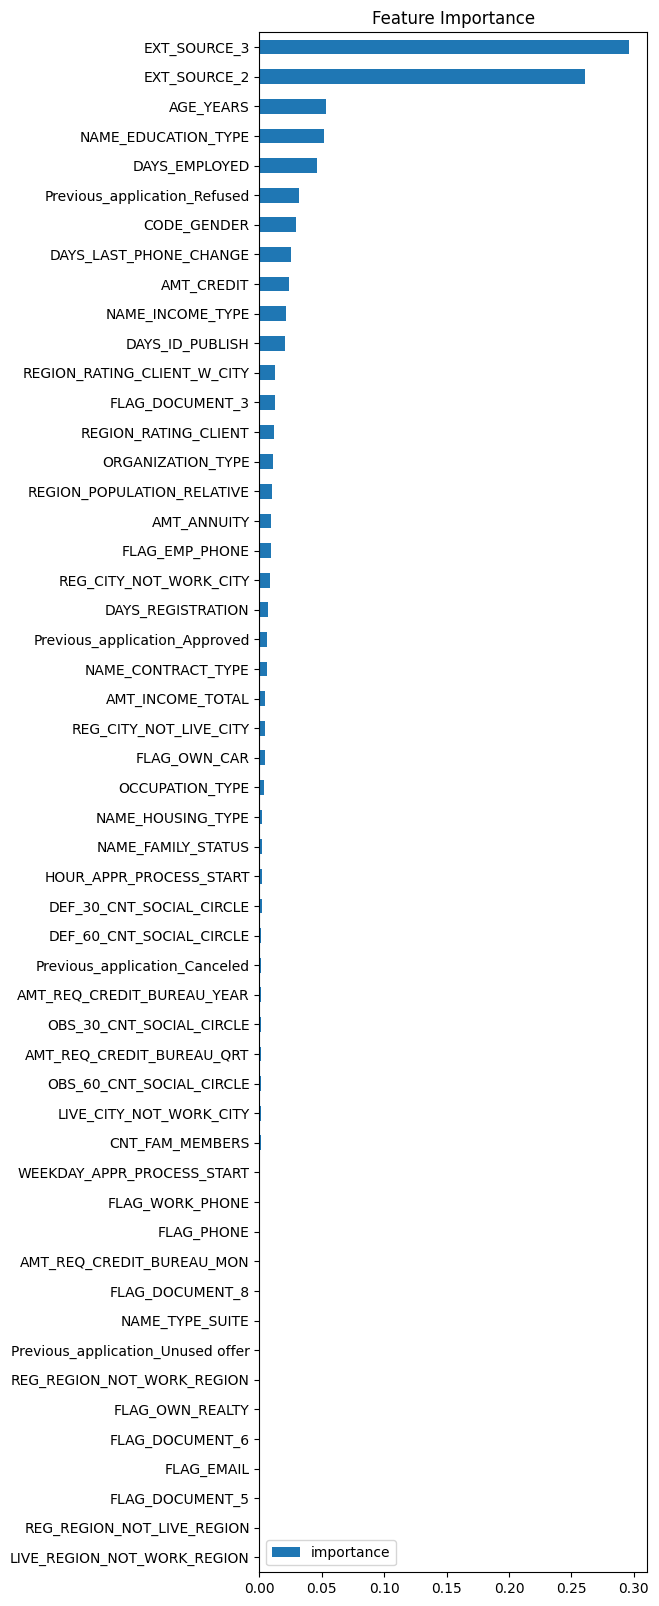

In [90]:
#Fit the training data to a random forest classifier and check the importance of each feature

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_depth=6,
                               min_samples_split=10,
                               bootstrap=True,
                               max_samples=0.8,
                               oob_score=True,
                               class_weight = "balanced",
                               n_jobs=-1,
                               random_state=0)
model.fit(X_train, y_train)
    
importance = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ["importance"]).sort_values("importance")
importance.plot(kind='barh', title="Feature Importance", figsize = (5, 20))
plt.show()


targets = application_data["TARGET"]

importance_df = calculate_feature_importance(X_train, y_train)

### Based on the generated plot, there are many features that are not important to the classifier as they don't contribute much to lowering impurity.
### The classifier is indicating that EXT_SOURCE_2 and EXT_SOURCE_3 are the most important features for lowering impurity accross all its trees. which matches our analysis insight.
### Any feature with importance < 0.02 will be dropped. 

In [97]:
dropped_features = importance_df[importance_df["importance"] < 0.02].index.tolist()
for X in [X_train, X_val, X_test]:
    X.drop(columns = dropped_features, inplace = True)
    
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221407 entries, 28834 to 255
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CODE_GENDER                   221407 non-null  float64
 1   AMT_CREDIT                    221407 non-null  float64
 2   NAME_INCOME_TYPE              221407 non-null  float64
 3   NAME_EDUCATION_TYPE           221407 non-null  float64
 4   DAYS_EMPLOYED                 221407 non-null  float64
 5   DAYS_ID_PUBLISH               221407 non-null  int64  
 6   EXT_SOURCE_2                  221407 non-null  float64
 7   EXT_SOURCE_3                  221407 non-null  float64
 8   DAYS_LAST_PHONE_CHANGE        221407 non-null  float64
 9   AGE_YEARS                     221407 non-null  float64
 10  Previous_application_Refused  221407 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 20.3 MB


In [ ]:
X_train.sample(5)

# Model Training and Evaluation 

### 1.The baseline model is a simple Decision Tree classifier with max_depth = 3 and balanced class weights to help it deal with the large gap between the majority class and minority class.Other models tested are Balanced Random Forest Classifier and XGB Classifier.

### 2.Balanced Random Forest is chosen in order to deal with the imbalance between classes. It works similarly to regular random forest classifiers, but it randomly under-samples each bootstrap sample, such that each tree of the forest will be provided a balanced bootstrap sample.Hyperparameter tuning for the Balanced Random Forest Classifier is done through randomized grid search.

### 3.Evaluation metrics to be used are class precision, recall and F1-score, ROC-AUC score, and the test set confusion matrix. 

In [91]:
# Utility functions

def evaluate_model(model, **data) -> None:
    """Evaluate model performance. It prints the accuracy, Classification Report, ROC-AUC score, and confusion matrix for the given data.
    
    Parameters
    ----------
    model:
        The trained machine learning model to be evaluated.
    
    **data: dict
        Keyword arguments representing the datasets. The key is the dataset name and the value is a tuple (X, y),
        where X is the input features and y is the labels (i.e. test_set = (X_test, y_test)).
    
    Returns
    -------
    None
        Prints the classification reports and displays the confusion matrices.
    """
    
    with plt.style.context('default'):
        n_datasets = len(data)
        fig, ax = plt.subplots(1, n_datasets, figsize = (6 * n_datasets, 6))

        for i, (dataset, (X, y_true)) in enumerate(data.items()):
            y_pred = model.predict(X)

            print(f"  {dataset} Classification Report:")
            print(classification_report(y_true, y_pred, target_names = ("Repaid", "Default"), digits = 4))
            print(f"{dataset} ROC - AUC score = {roc_auc_score(y_true, model.predict_proba(X)[:, 1])}")

            axis = ax if n_datasets == 1 else ax[i]
            axis.set_title(f"  {dataset} Confusion Matrix")
            ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                                    ax = axis,
                                                    cmap = "cividis",
                                                    normalize = 'true',
                                                    display_labels = ("Repaid", "Default")
                                                  )
            
def draw_roc(y_true: Any, y_score: Any) -> None:
    """Draw the ROC curve for a classifier output.
    
    Parameters
    ----------
    y_true: Array-like
        True labels.
    
    y_score: Array-like 
        The probability score for each class label. Must be of shape (n_samples,) in the binary case, or (n_samples, n_classes) in the multiclass case. 
    """
    
    fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate = False)
    auc_score = roc_auc_score(y_true, y_score)
    
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = f'ROC curve (area = {auc_score:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True, which="both")
    plt.legend(loc = "lower right")
    
    plt.show()

# Decision Tree Classifier

Decision Tree Classifier:
**************************************************************************************************************************
**************************************************************************************************************************
For Train Data
  train_set Classification Report:
              precision    recall  f1-score   support

      Repaid     0.9508    0.7234    0.8217    203486
     Default     0.1547    0.5745    0.2437     17921

    accuracy                         0.7114    221407
   macro avg     0.5527    0.6490    0.5327    221407
weighted avg     0.8863    0.7114    0.7749    221407

train_set ROC - AUC score = 0.6890530505441267
  validation_set Classification Report:
              precision    recall  f1-score   support

      Repaid     0.9521    0.7208    0.8205     22646
     Default     0.1520    0.5795    0.2408      1955

    accuracy                         0.7096     24601
   macro avg     0.5520    0.6502    0.5306   

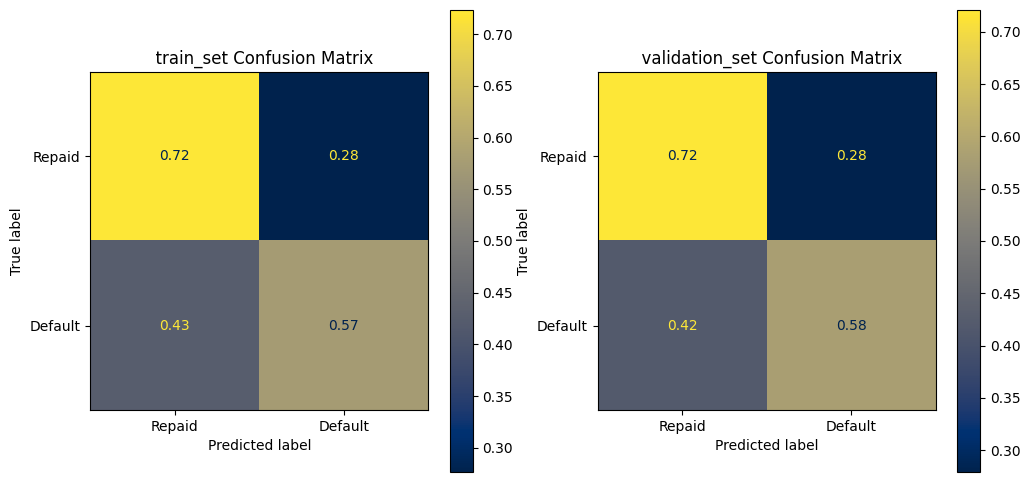

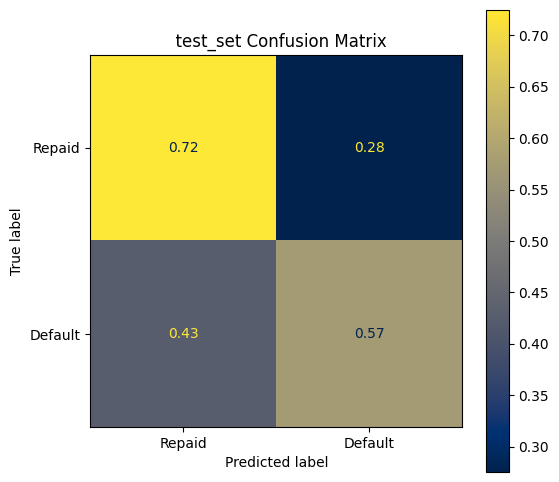

In [93]:
#Baseline Estimator: Decision Tree Classifier

print("Decision Tree Classifier:")

print('**************************************************************************************************************************')


baseline = DecisionTreeClassifier(max_depth = 3, 
                                  class_weight = "balanced",
                                  random_state = seed)
baseline.fit(X_train, y_train)

print('**************************************************************************************************************************')
print("For Train Data")

evaluate_model(baseline, train_set = (X_train, y_train), validation_set = (X_val, y_val))

print('**************************************************************************************************************************')
print("For Test Data")

evaluate_model(baseline, test_set = (X_test, y_test))

# Balanced Random Forest Classifier with randomized grid search

Balanced Random Forest Classifier with randomized grid search:
**************************************************************************************************************************
Fitting 2 folds for each of 30 candidates, totalling 60 fits
***************************************************************************************************************************************************
Best fitted parameters: {'replacement': False, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 8, 'class_weight': 'balanced_subsample'}
***************************************************************************************************************************************************
  train_set Classification Report:
              precision    recall  f1-score   support

      Repaid     0.9646    0.6793    0.7972    203486
     Default     0.1644    0.7165    0.2674     17921

    accuracy                         0.6823    221407
   macro avg     0.5645    0.6979    0.5323    221407
weigh

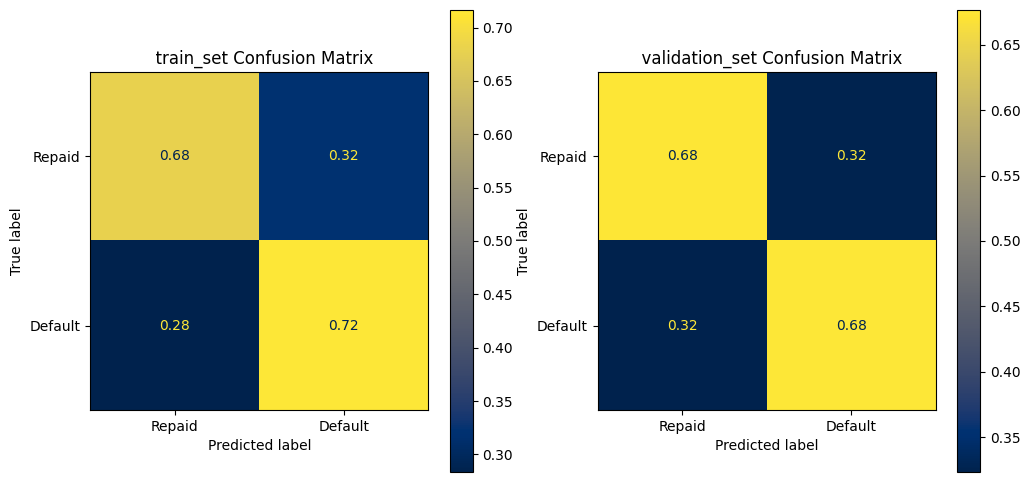

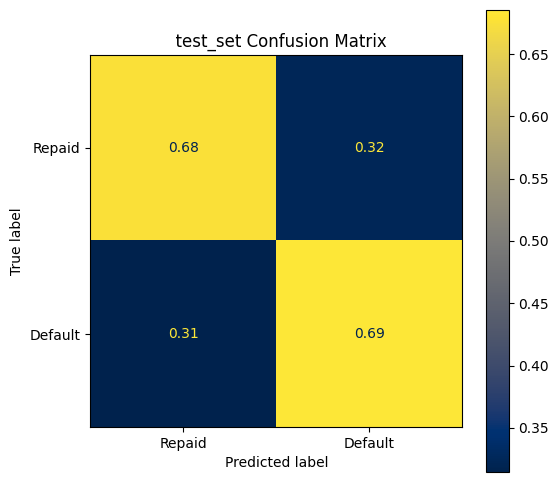

In [95]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier


print("Balanced Random Forest Classifier with randomized grid search:")

print('**************************************************************************************************************************')

#Grid search for hyperparameters tuning
params = dict(
    n_estimators = range(50, 210, 50),
    max_depth = range(5, 10),
    min_samples_leaf = range(1, 4),
    replacement = [True, False],
    class_weight = ["balanced" ,"balanced_subsample"],
)

model = BalancedRandomForestClassifier(criterion = 'gini',
#                                        class_weight = "balanced_subsample", 
#                                        replacement = True,
                                       n_jobs = -1, 
                                       random_state = seed)

clf = RandomizedSearchCV(model, 
                        params,
                        n_iter = 30,
                        scoring = "f1_macro",
                        cv = 2,
                        n_jobs = -1,
                        verbose = 4)
clf.fit(X_train, y_train)

print('***************************************************************************************************************************************************')

print("Best fitted parameters:", clf.best_params_)

print('***************************************************************************************************************************************************')

evaluate_model(clf, train_set = (X_train, y_train), validation_set = (X_val, y_val))

print('***************************************************************************************************************************************************')

evaluate_model(clf, test_set = (X_test, y_test))

# XGB Classifier

XGB Classifier:
******************************************************************************************************************************************************************************
******************************************************************************************************************************************************************************
******************************************************************************************************************************************************************************
  train_set Classification Report:
              precision    recall  f1-score   support

      Repaid     0.9946    0.8916    0.9402    203486
     Default     0.4341    0.9446    0.5949     17921

    accuracy                         0.8959    221407
   macro avg     0.7143    0.9181    0.7676    221407
weighted avg     0.9492    0.8959    0.9123    221407

train_set ROC - AUC score = 0.9717554237442285
  validation_set Classification Report:
          

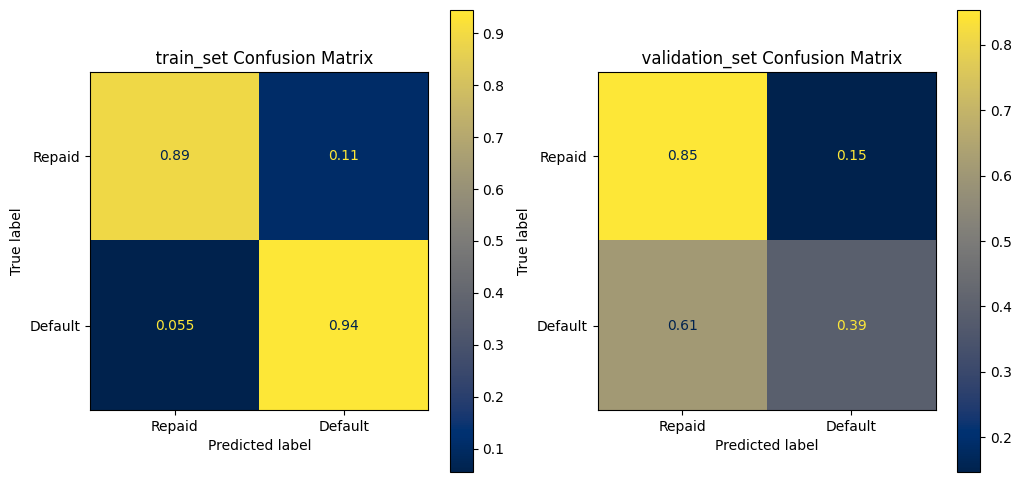

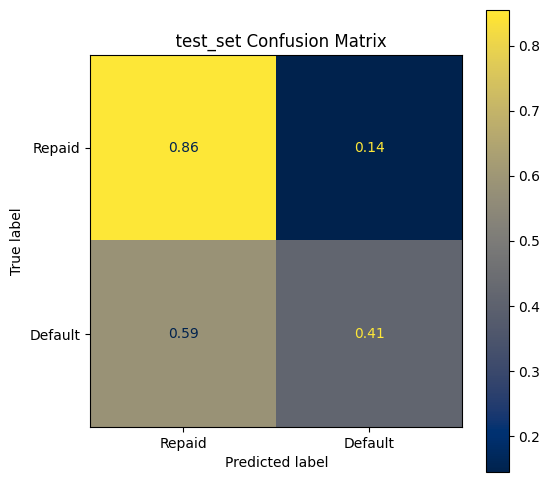

In [96]:
print("XGB Classifier:")

print('******************************************************************************************************************************************************************************')

# Define the parameters for the model
params = dict(
    base_score = 0.5, booster = 'gbtree', colsample_bylevel = 1,
    colsample_bynode = 1, colsample_bytree = 1, gamma = 0,
    importance_type = 'gain', interaction_constraints = '',
    learning_rate = 0.3, max_delta_step = 0, max_depth = 6,
    min_child_weight = 1, missing = np.nan, monotone_constraints = '()',
    n_estimators = 500, n_jobs = -1, num_parallel_tree = 1,
    random_state = seed, reg_alpha = 0,
    reg_lambda = 1, scale_pos_weight = 10, subsample = 1,
    tree_method = 'exact', use_label_encoder = False,
    validate_parameters = 1, verbosity = None
)

print('******************************************************************************************************************************************************************************')

model = XGBClassifier(**params)
model.fit(X_train, y_train)

print('******************************************************************************************************************************************************************************')

evaluate_model(model, train_set = (X_train, y_train), validation_set = (X_val, y_val))

print('******************************************************************************************************************************************************************************')

evaluate_model(model, test_set = (X_test, y_test))


# Conclusion

## a.The XGB Classifier emerged as the top performer among the three classifiers, demonstrating superior predictive accuracy and ability to distinguish between default and non-default cases.

## b.Despite its complexity and computational requirements, the XGB Classifier offers the highest potential for accurate loan default prediction.

## c.Depending on project requirements and computational resources, the Decision Tree and Balanced Random Forest classifiers can still be viable options, especially when interpretability and computational efficiency are prioritized over predictive performance.

## d.Also the XGB Classifier outperforms both the Decision Tree and Balanced Random Forest classifiers in terms of accuracy and ROC-AUC score on the training set. It also has the highest ROC-AUC score on the test set, indicating better performance in distinguishing between positive and negative classes.

## e.However, the Decision Tree Classifier and Balanced Random Forest Classifier also provide reasonably good results, especially considering their simplicity compared to the XGB Classifier.